# Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

**Description of fnlwgt (final weight):**
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

In [2]:
cen_income = pd.read_csv("census_income.csv")
cen_income.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

# EDA

In [3]:
cen_income.shape

(32560, 15)

There are 32560 rows and 15 columns

In [4]:
cen_income.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values

In [5]:
cen_income.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Dataset have 9 columns with object type data which we will have to encode

In [6]:
cen_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
cen_income.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

All the columns are not present as they are of object type. Count of each column is 32560 showing there are no null values. Mean is very much greater than the median in capital gain and capital loss stating that there is high skewness present and data is skewed to the right side. Also there is high variance in Capital gain and Capital loss column. Min, Max, and interquartile ranges have variable difference, that means there are outliers present in the data.

In [8]:
cen_income.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [9]:
#We separate categorical and continuous features
continues= ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
catagorical = ['Workclass', 'Education', 'Marital_status','Occupation', 'Relationship', 'Race', 'Sex','Native_country','Income']

In [10]:
print(f"There are {len(cen_income[catagorical].columns)} Categorical Attributes")
print(f"There are {len(cen_income[continues].columns)} Numerical Attributes")

There are 9 Categorical Attributes
There are 6 Numerical Attributes


In [11]:
cen_income.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [12]:
cen_income.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

There are no NaN value available in the dataset but there are ' ?' available, lets check how many ' ?' are there and then we will try to remove

In [13]:
for column in cen_income.columns:
    print(f"{column} = {cen_income[cen_income[column] == ' ?'].shape[0]}")

Age = 0
Workclass = 1836
Fnlwgt = 0
Education = 0
Education_num = 0
Marital_status = 0
Occupation = 1843
Relationship = 0
Race = 0
Sex = 0
Capital_gain = 0
Capital_loss = 0
Hours_per_week = 0
Native_country = 583
Income = 0


There were 3 object columns which are having ' ?' in the data, lets try to fill them all with their own column's mod.

In [14]:
cen_income["Workclass"][cen_income["Workclass"] == " ?"] = cen_income["Workclass"].mode()[0]
cen_income["Occupation"][cen_income["Occupation"] == " ?"] = cen_income["Occupation"].mode()[0]
cen_income["Native_country"][cen_income["Native_country"] == " ?"] = cen_income["Native_country"].mode()[0]

lets check again in the dataset for ' ?' values.

In [15]:
for column in cen_income.columns:
    print(f"{column} = {cen_income[cen_income[column] == ' ?'].shape[0]}")

Age = 0
Workclass = 0
Fnlwgt = 0
Education = 0
Education_num = 0
Marital_status = 0
Occupation = 0
Relationship = 0
Race = 0
Sex = 0
Capital_gain = 0
Capital_loss = 0
Hours_per_week = 0
Native_country = 0
Income = 0


We can see that question marks are gone 

## Univariant Analysis

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

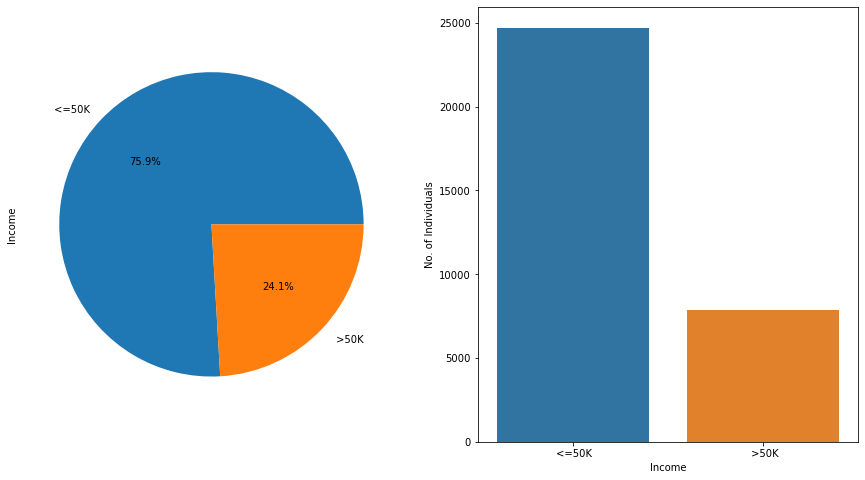

In [16]:
# ploting for Income
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
cen_income['Income'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x='Income',data=cen_income)
plt.ylabel('No. of Individuals')
cen_income['Income'].value_counts()

Dataset if highly imbalanced. There is less than 25% of >50K income category while more than 75% of <=50K income.

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

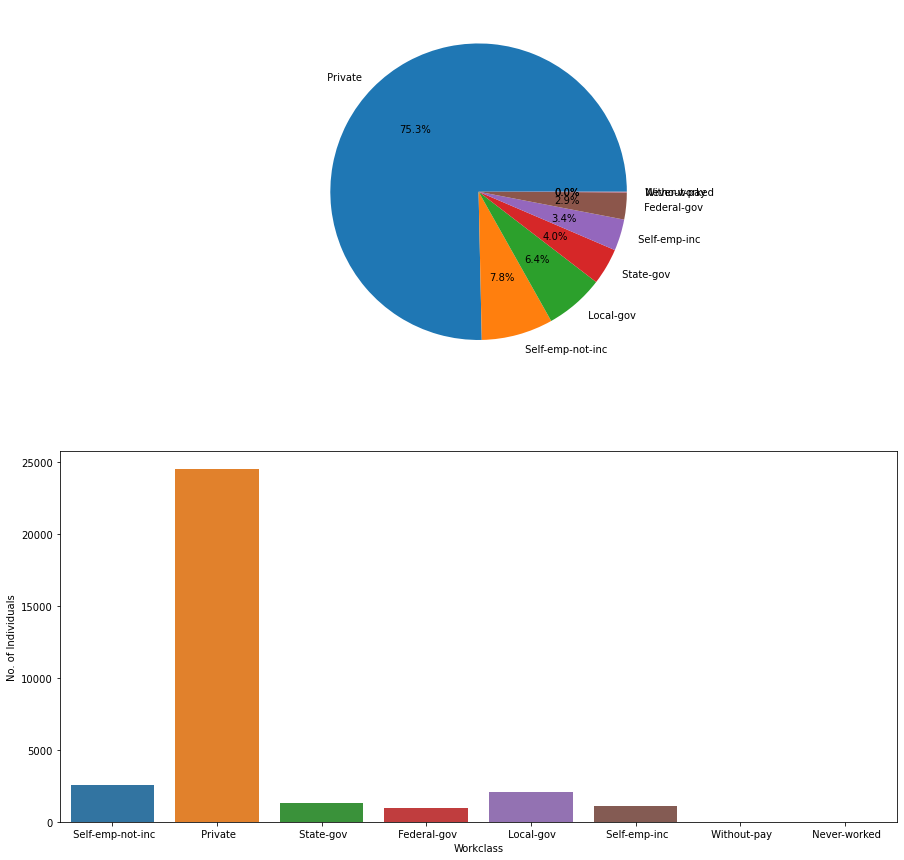

In [17]:
# plotting for workclass
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
cen_income['Workclass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x='Workclass',data=cen_income)
plt.ylabel('No. of Individuals')
cen_income['Workclass'].value_counts()

There are 9 workclass in total including Never worked. Most individuals work in private sector and there are very few who have never worked or work without pay. There are 3 categories of govt job provided state, federal and local among which no. of people working in the local govt is highest.

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

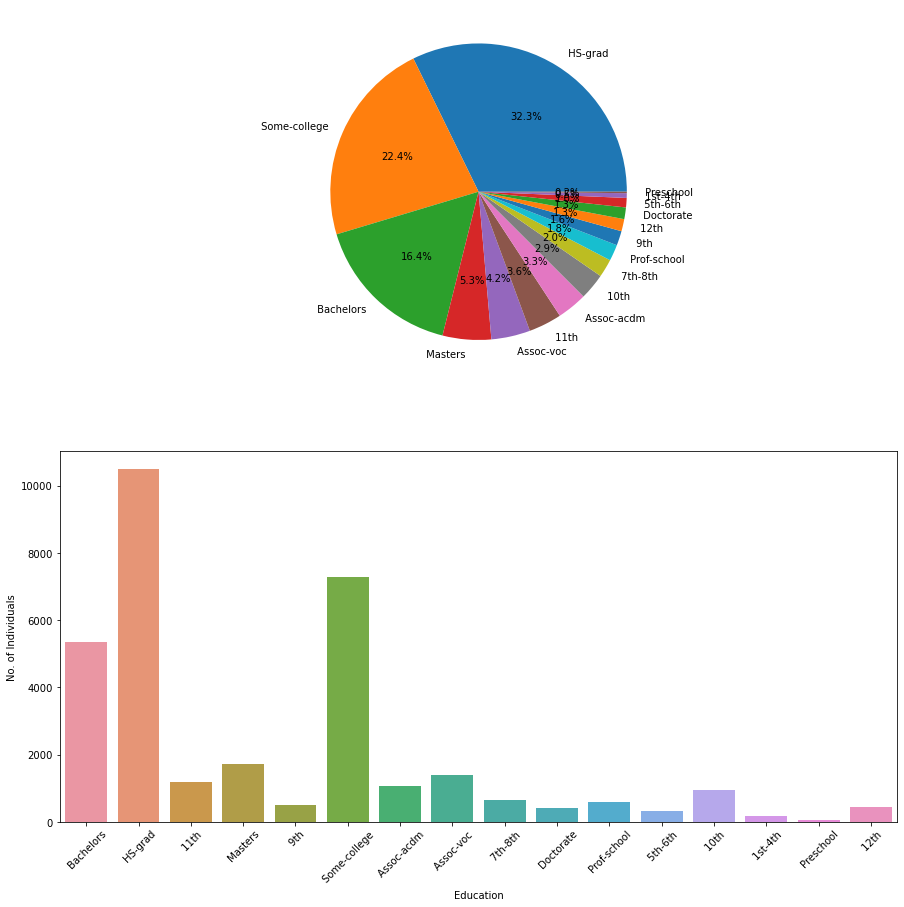

In [18]:
# plotting for Education 
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
cen_income['Education'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x='Education',data=cen_income)
plt.xticks(rotation=45)
plt.ylabel('No. of Individuals')
cen_income['Education'].value_counts()

Most of the people are high school graduate. There are few who have done masters and doctorate. The no. of people who went through just the preschool or 1st to 4th is the least.

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

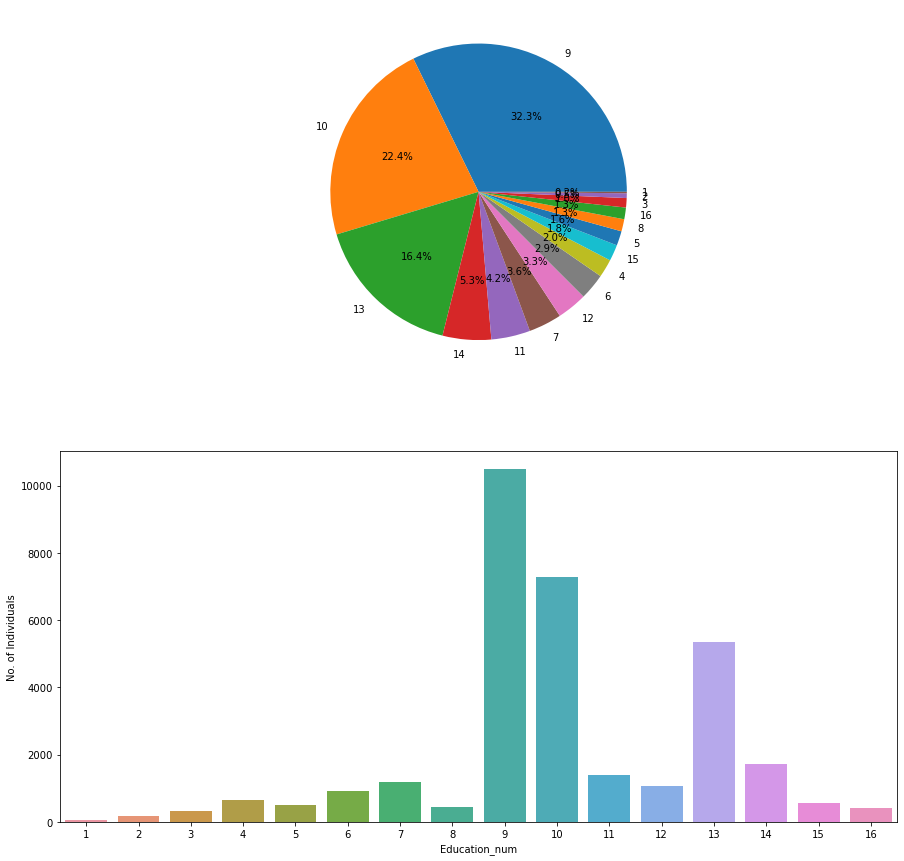

In [19]:
#plotting for Education Number
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
cen_income['Education_num'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x='Education_num',data=cen_income)
plt.ylabel('No. of Individuals')
cen_income['Education_num'].value_counts()

Majority of individuals lie in the 9th 10th category of education no. which is a liitle higher than the median education number. People with least and highest educations are very few.

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

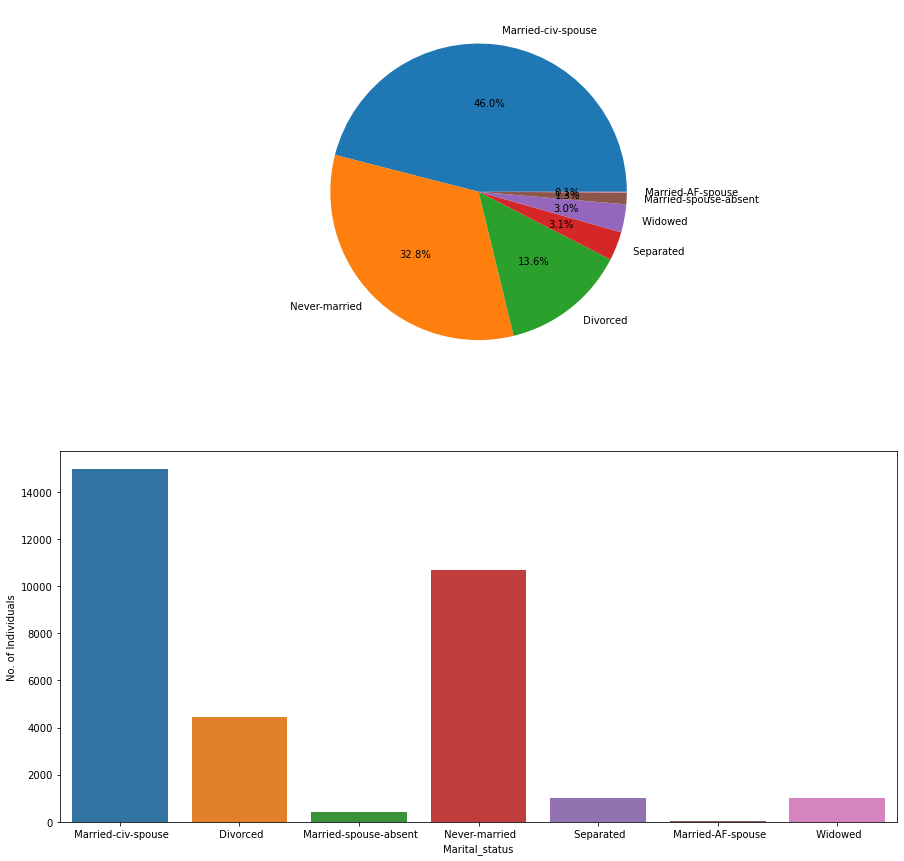

In [20]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
cen_income['Marital_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x='Marital_status',data=cen_income)
plt.ylabel('No. of Individuals')
cen_income['Marital_status'].value_counts()

Majority of people are married to a civialian spouse or Never married. Least people are married to armed forces. 

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

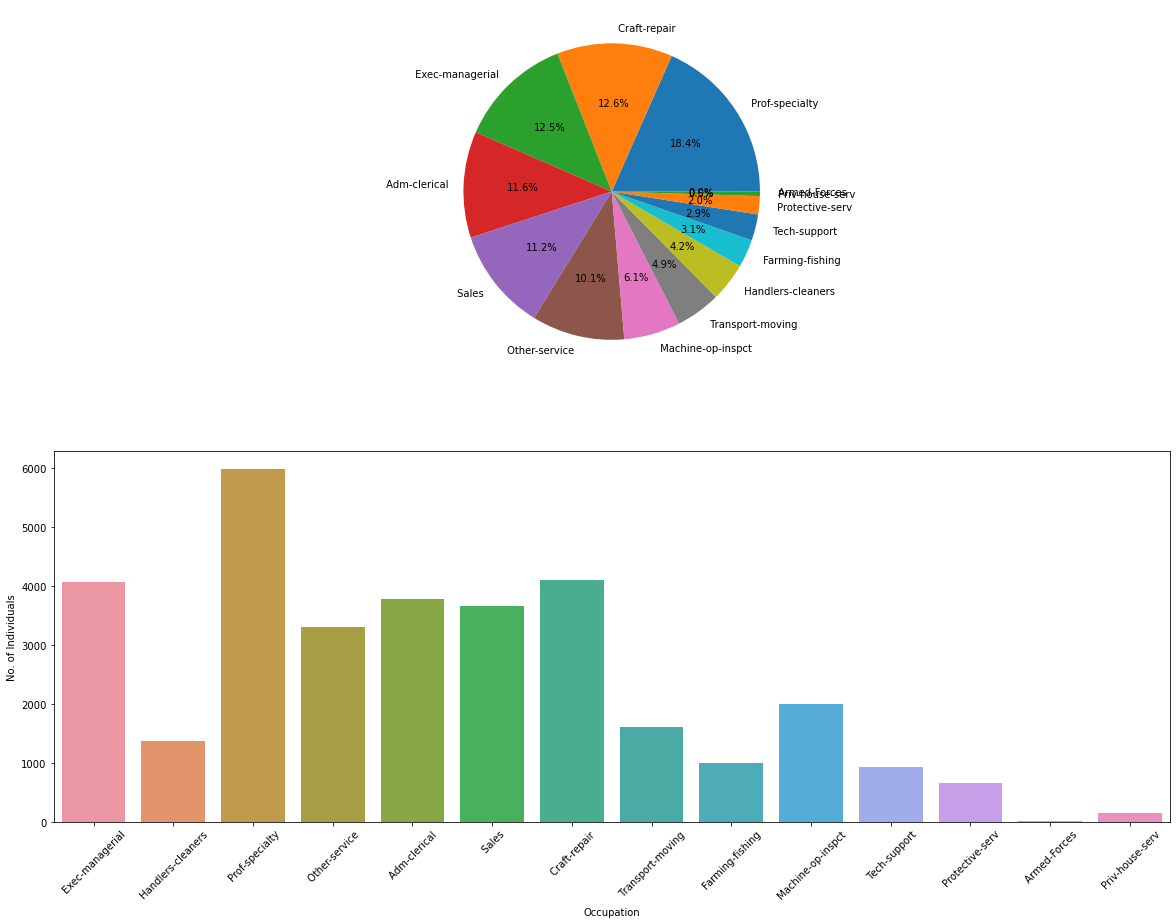

In [21]:
#Plotting for Occupation
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
cen_income['Occupation'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x='Occupation',data=cen_income)
plt.xticks(rotation=45)
plt.ylabel('No. of Individuals')
cen_income['Occupation'].value_counts()

We can observe over here that prof-speciality has the highest number for people than any other occupation. followed by craft repair persons. Minimum occupation category is the armed forces with only 9 people in it.

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

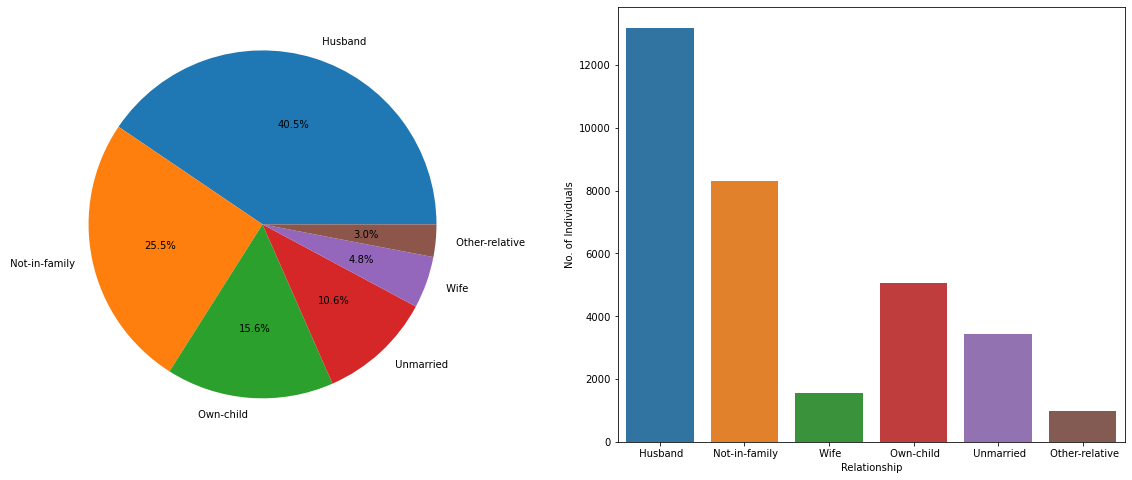

In [22]:
#plotting for Relationship
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
cen_income['Relationship'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(1,2,2)
sns.countplot(x='Relationship',data=cen_income)
plt.ylabel('No. of Individuals')
cen_income['Relationship'].value_counts()

There are much more husband working than their wives. There are 25% individuals working who fall in not in family category.

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

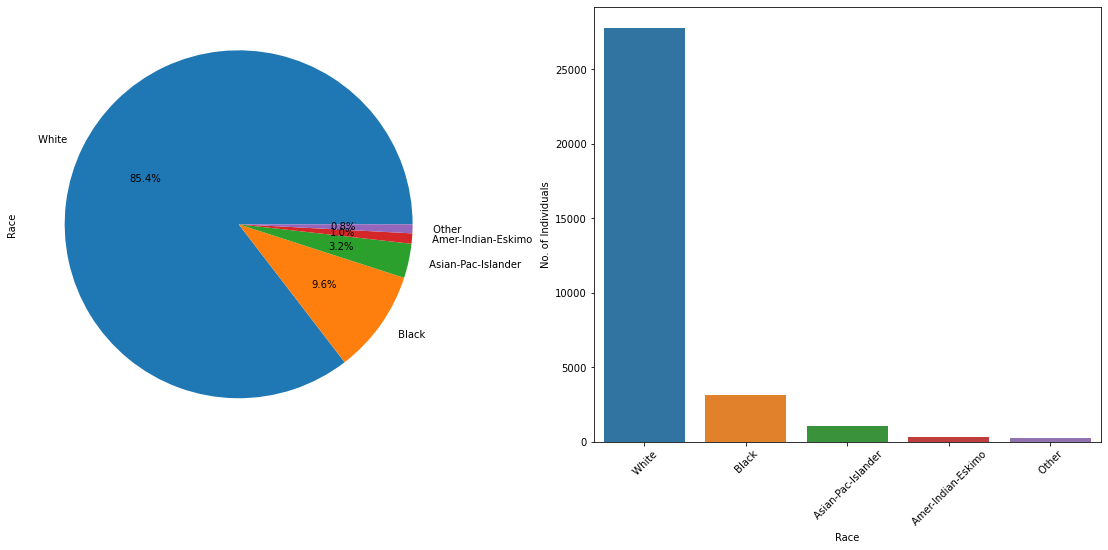

In [23]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
cen_income['Race'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x='Race',data=cen_income)
plt.xticks(rotation=45)
plt.ylabel('No. of Individuals')
cen_income['Race'].value_counts()

Most of the individuals working here are white. There is also an other category where minory races are present.

 Male      21789
 Female    10771
Name: Sex, dtype: int64

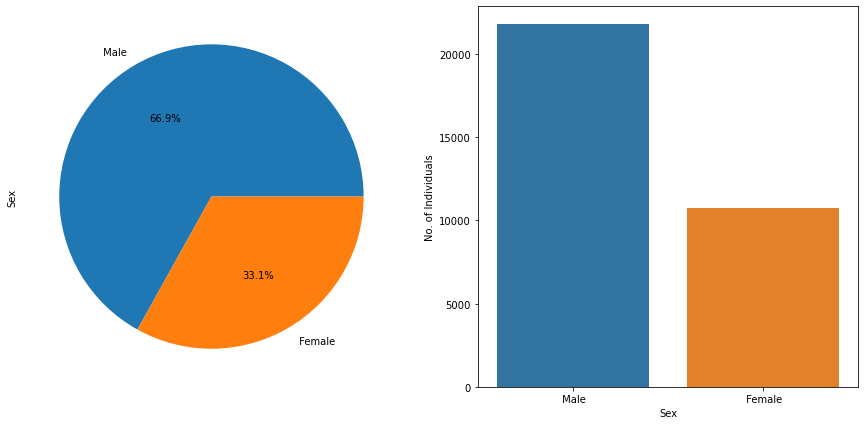

In [24]:
#plotting for Sex
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
cen_income['Sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x='Sex',data=cen_income)
plt.ylabel('No. of Individuals')
cen_income['Sex'].value_counts()

There is more than double the number of men working than the no. of women.

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

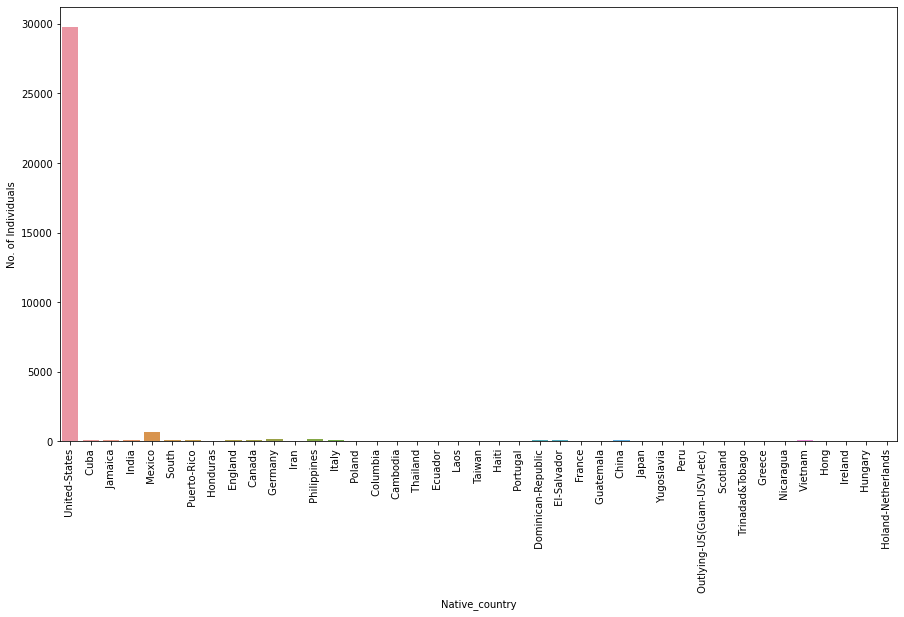

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(x='Native_country',data=cen_income)
plt.xticks(rotation=90)
plt.ylabel('No. of Individuals')
cen_income['Native_country'].value_counts()

Majority of the people working belong from U.S. whereas there are people who come to U.S. from their own countries but there no. is very low. Second highest no. of people belong from Mexico as it is a neighboring country.

Minimum 17
Maximum 90


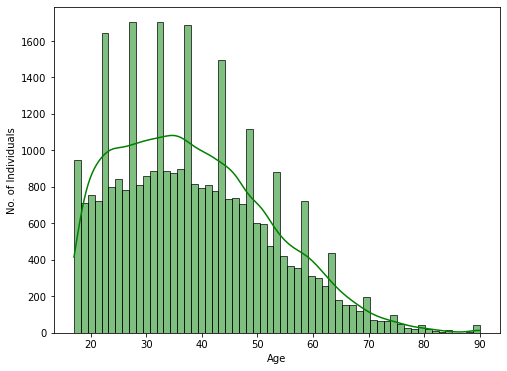

In [26]:
#plotting hisplot for Age
plt.figure(figsize=(8,6))
sns.histplot(cen_income['Age'],kde=True,color='g')
plt.ylabel('No. of Individuals')
print('Minimum',cen_income['Age'].min())
print('Maximum',cen_income['Age'].max())

Minimum age of a working individual is 17 and highest is 90 which is way far retirement, but majority of the people working are in the age 25 to 45. Data is skewed to the right side.

Minimum 12285
Maximum 1484705


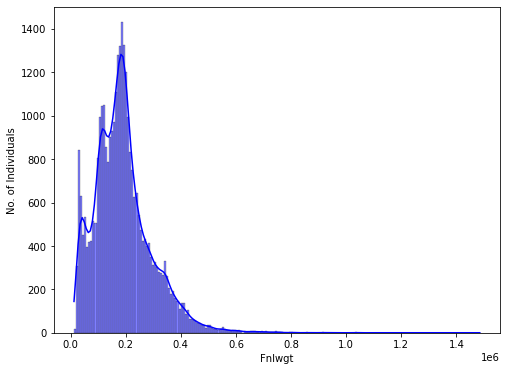

In [27]:
#plotting hisplot for Fnlwgt
plt.figure(figsize=(8,6))
sns.histplot(cen_income['Fnlwgt'],kde=True,color='b')
plt.ylabel('No. of Individuals')
print('Minimum',cen_income['Fnlwgt'].min())
print('Maximum',cen_income['Fnlwgt'].max())

Minimum 0
Maximum 99999


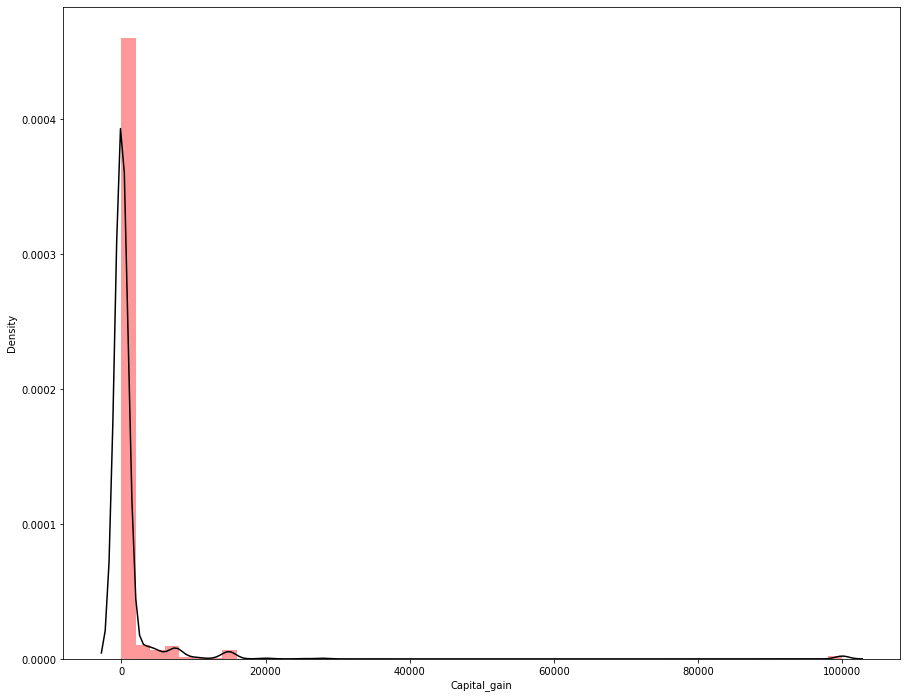

In [28]:
plt.figure(figsize=(15,12))
sns.distplot(cen_income['Capital_gain'],color='r', kde_kws={"color": "k"})
print('Minimum',cen_income['Capital_gain'].min())
print('Maximum',cen_income['Capital_gain'].max())

Minimum capital gain is 0 while the range goes on to 99999 but most of the people are with the gain of 1000. Data is highly skewed with a very long tail due to presence of large outliers. Outliers here are very few people belonging to elite class who have very large capital gains.

Minimum 0
Maximum 4356


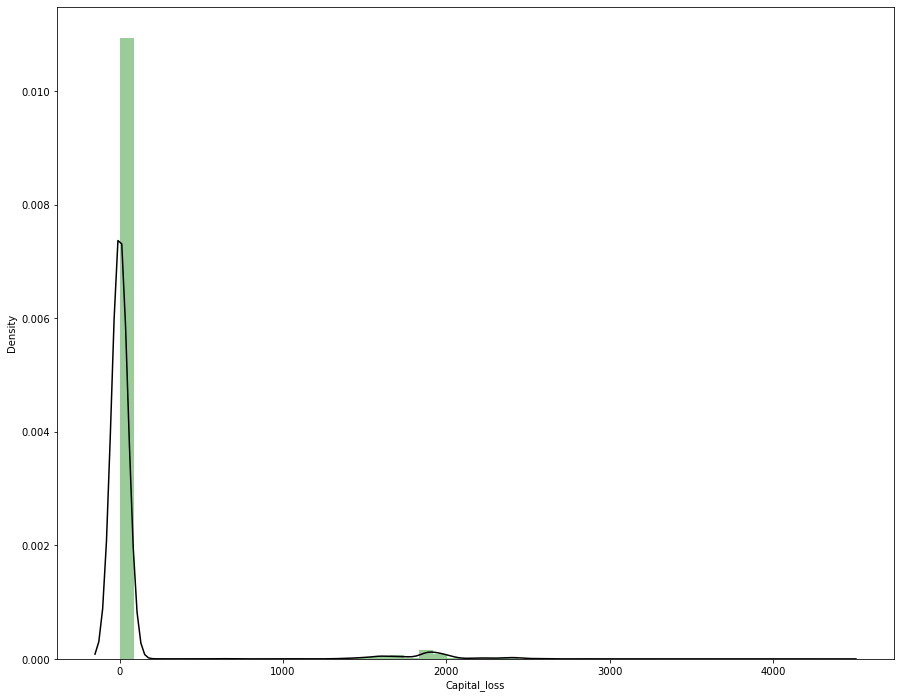

In [29]:
plt.figure(figsize=(15,12))
sns.distplot(cen_income['Capital_loss'],color='g', kde_kws={"color": "k"})
print('Minimum',cen_income['Capital_loss'].min())
print('Maximum',cen_income['Capital_loss'].max())

Minimum capital loss is 0 while the range goes on above 4000 but most of the people are with the loss of 1000. There is also a slight peak seen near 2000. Data is highly skewed with a long tail to the right side.

Minimum 1
Maximum 99


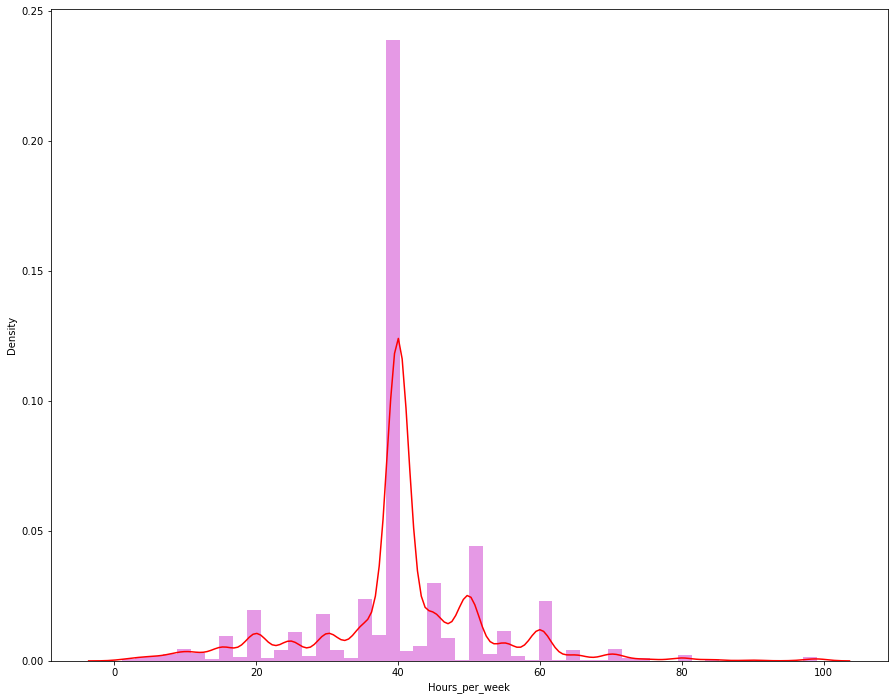

In [30]:
plt.figure(figsize=(15,12))
sns.distplot(cen_income['Hours_per_week'],color='m', kde_kws={"color": "r"})
print('Minimum',cen_income['Hours_per_week'].min())
print('Maximum',cen_income['Hours_per_week'].max())


Most of the people work 40 hours a day where there is a high chance that they belong to private sector. There are people working as low ass 1 hour a week and as high as 99 hours a week which undoubtfully might belong from the armed forces. Data shows less skewness compared to the other features in the dataframe.

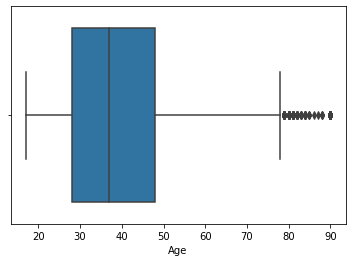

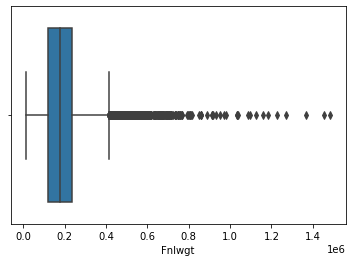

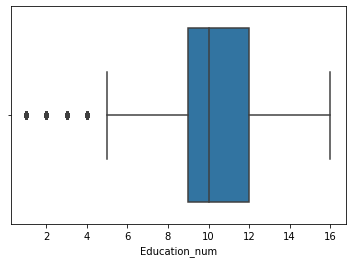

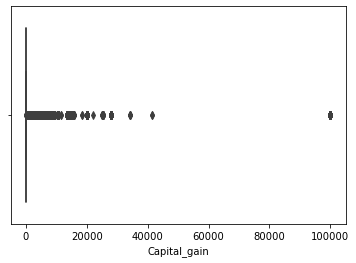

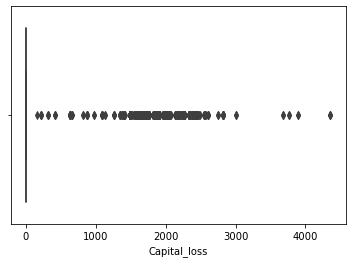

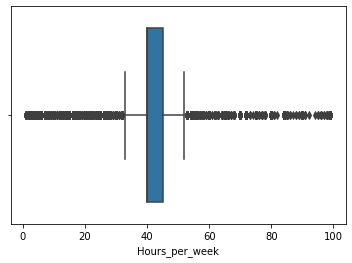

<Figure size 432x288 with 0 Axes>

In [31]:
#plotting boxplot for continues feature to check for outliers 
for i in continues:
    sns.boxplot(cen_income[i])
    plt.figure()

There are outliers in all the features, while capital gain and capital loss have very vast no. of outliers.

## Bivariate Analysis

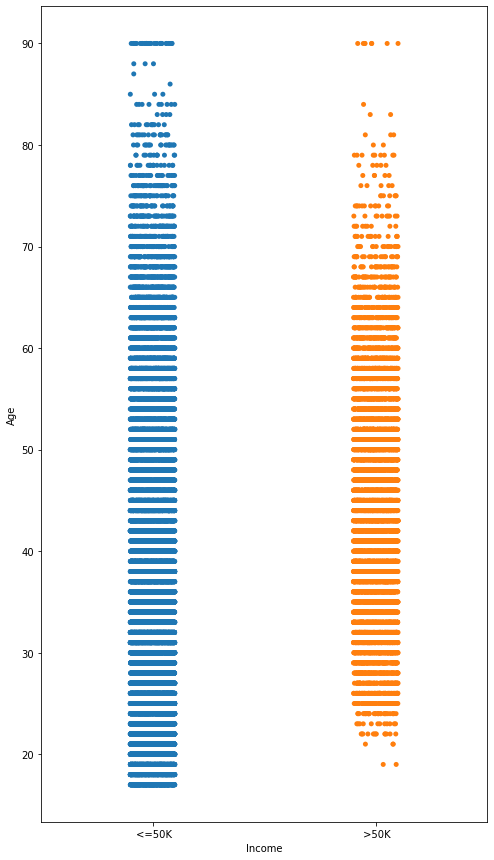

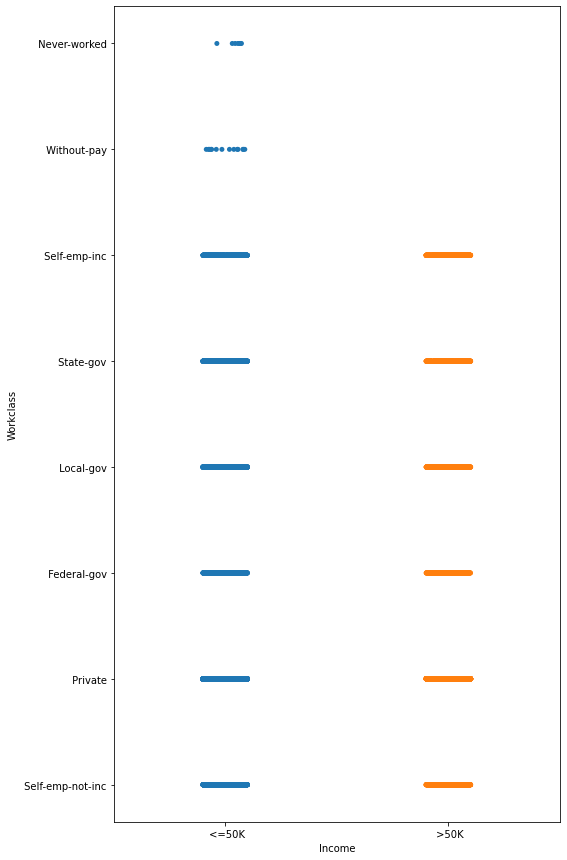

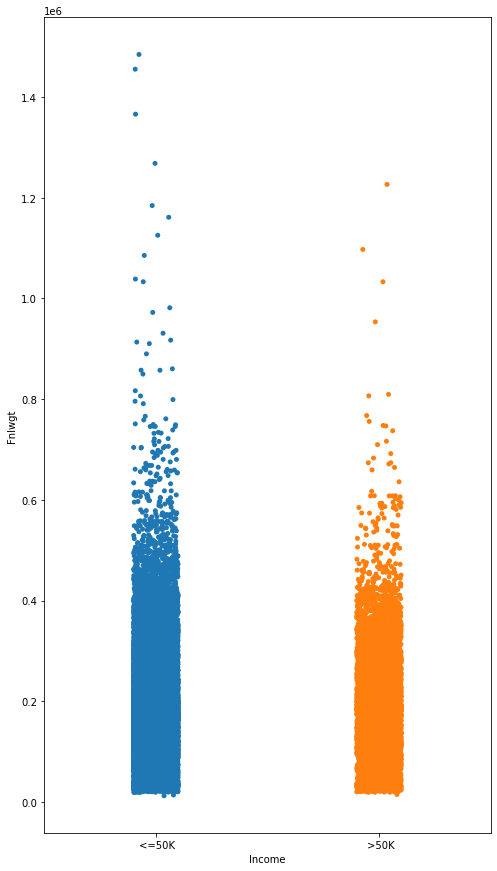

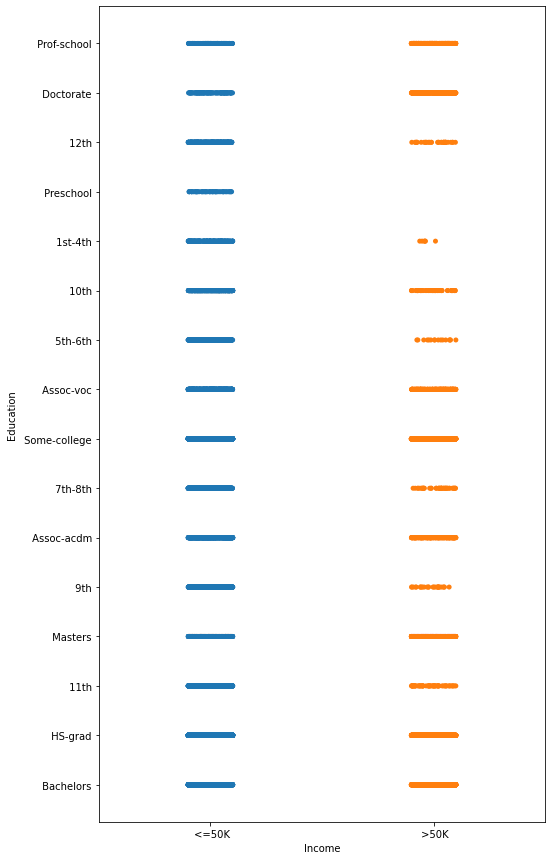

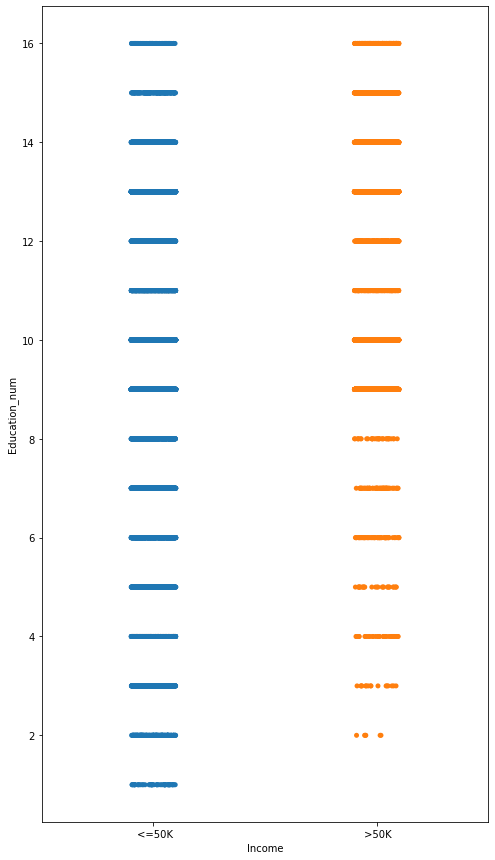

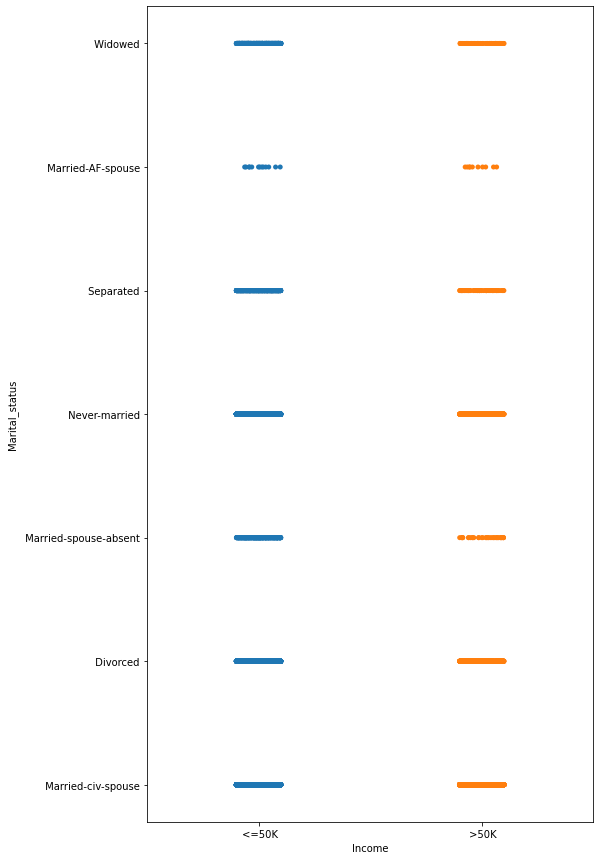

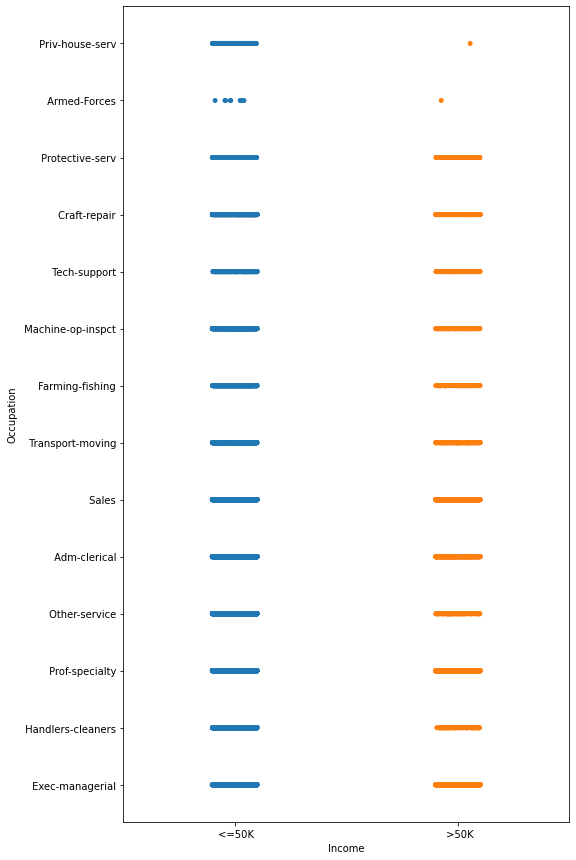

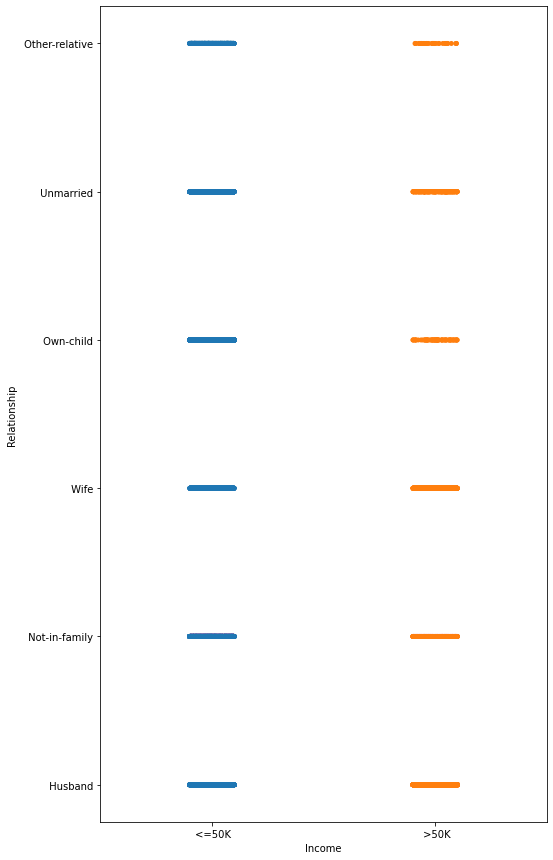

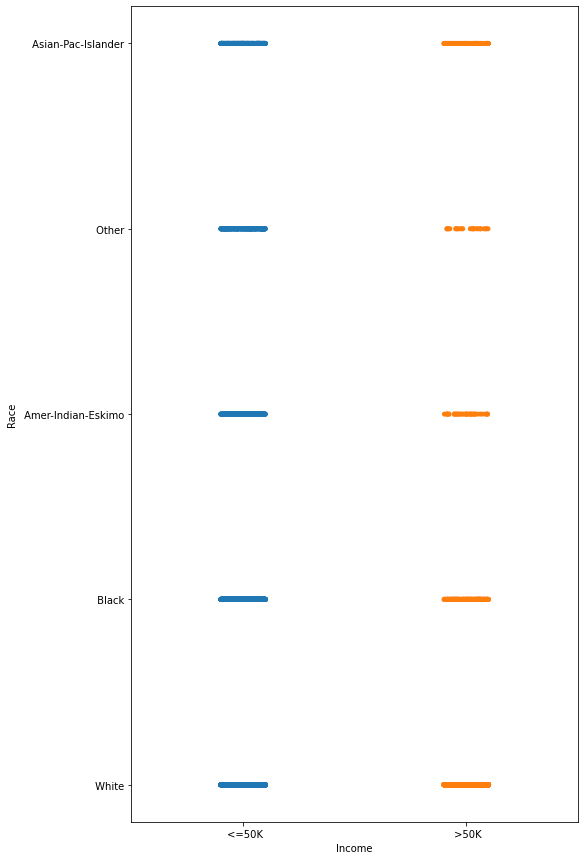

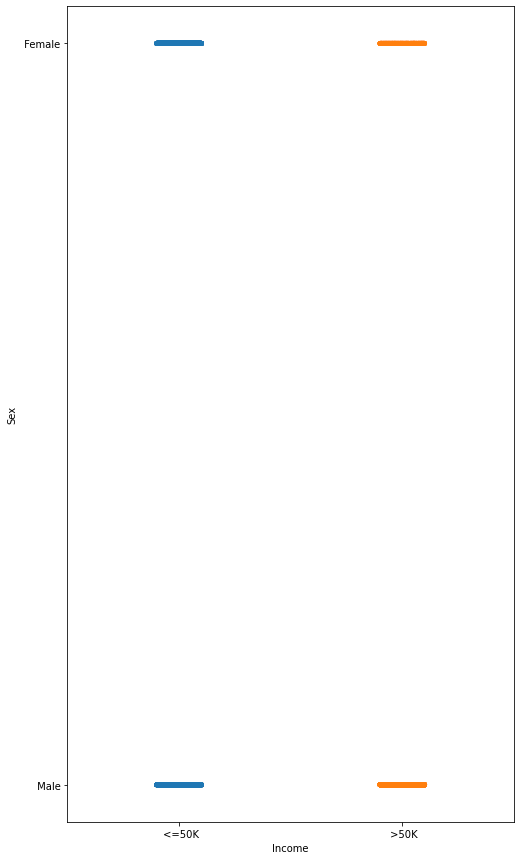

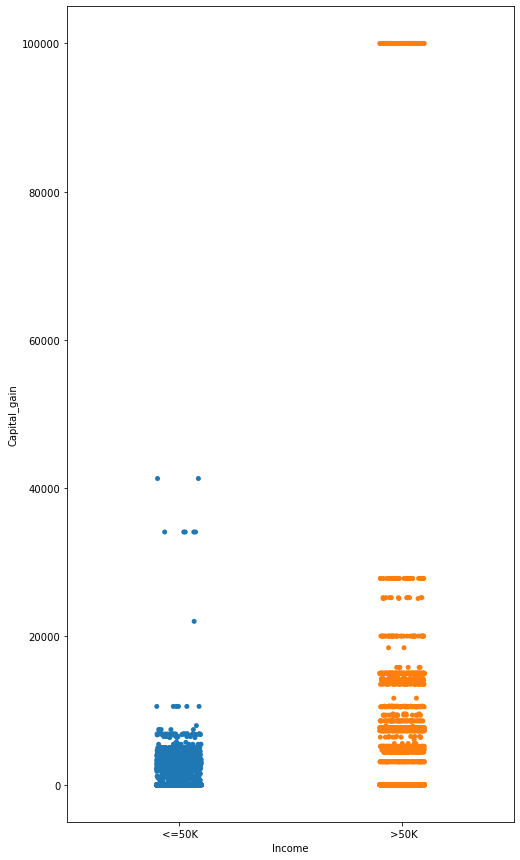

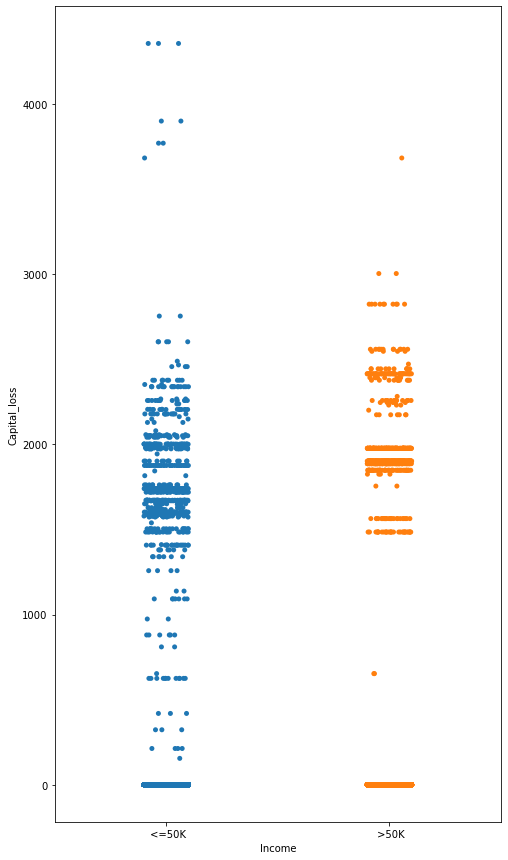

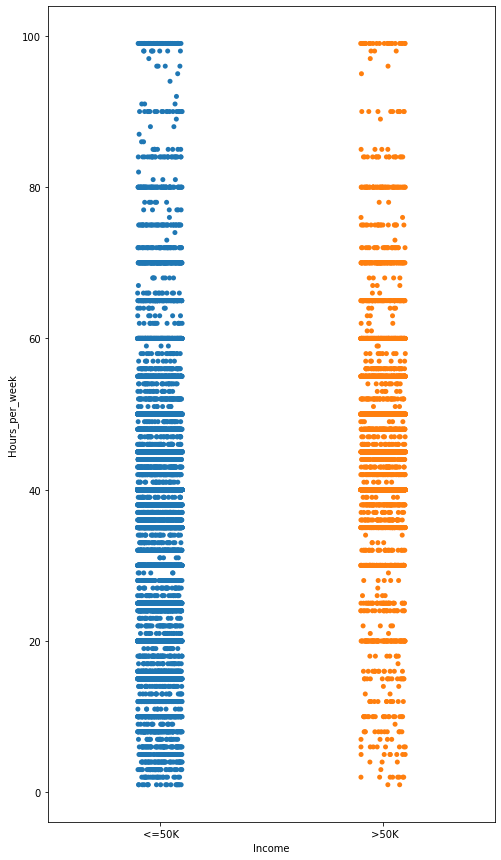

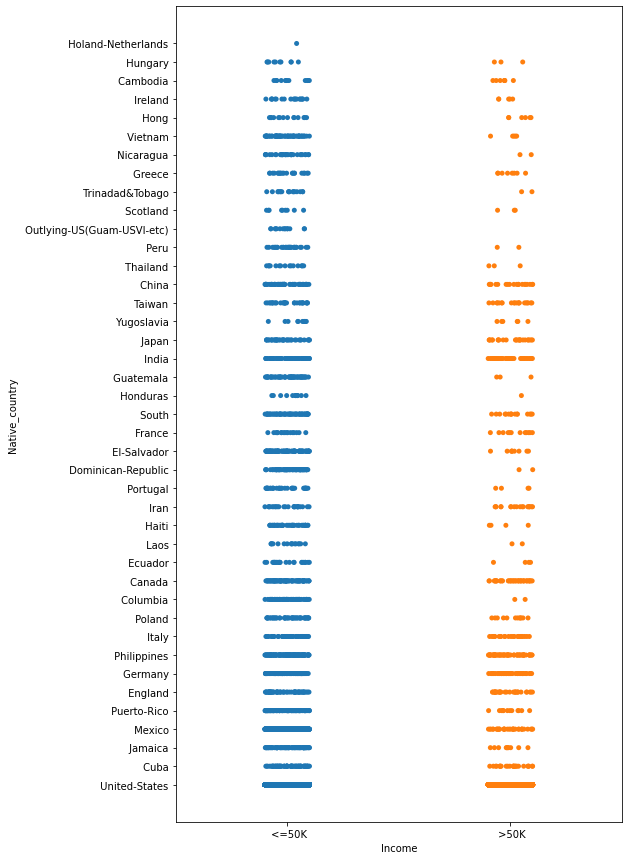

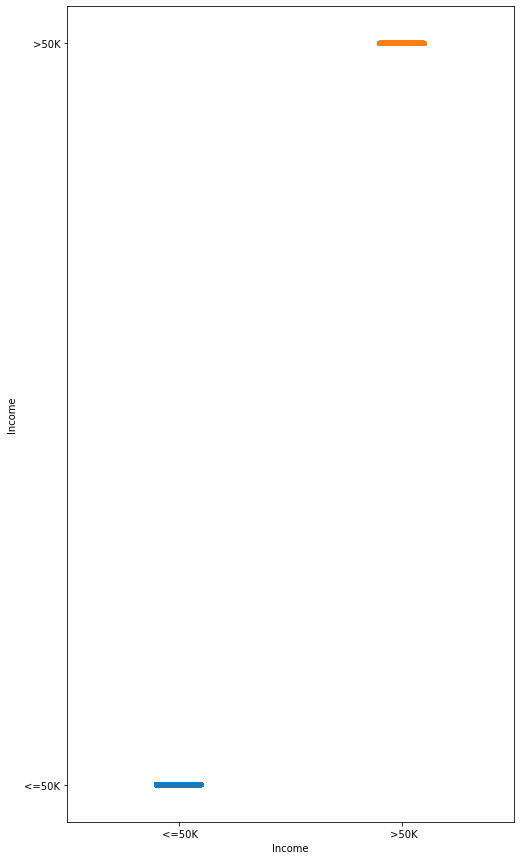

In [32]:
#checking the relation with respect to income
for i in cen_income.columns:
    plt.figure(figsize=(8,15))
    sns.stripplot(x='Income',y=i,data=cen_income)

* It is clearly seen that as the education no. increases chances of earning >50K salary also increases
* There are less no. of individual who are married armed forces spouse, thats why the no. is less in both the categories while people with married spouse absent are less in >50k category income comparatively.
* There are very few people with income greater than armed forces and private house service while all the other categories of people are distributed evenly in both the income categories.
* The grapghs shows people belonging to diff countries have less chances of earning >50k which is wrong, this is because no. of individuals belonging from other countries other than U.S are very low nut it is to be noticed that there are more people in the category <=50k than >50k.
* People with higher mean age earn >50k while there are individuals earning <=50k even wat very high age.
* People are equally divided with respect to fnlwgt in the income category while it is seen that as the fnlwt is high indiduals fall into <=50k income category.
* As the capital gain increases more people fall into >50k salary while mean of both categories remain cloase to zero capital gain.
* There is more density in the >50k income category with increase in capital loss while mean of both categories remain cloase to zero capital gain.
* People earning >50K income work mean hours per week greater than tose earning <50K while people from both the categories work from min to max hours per week.

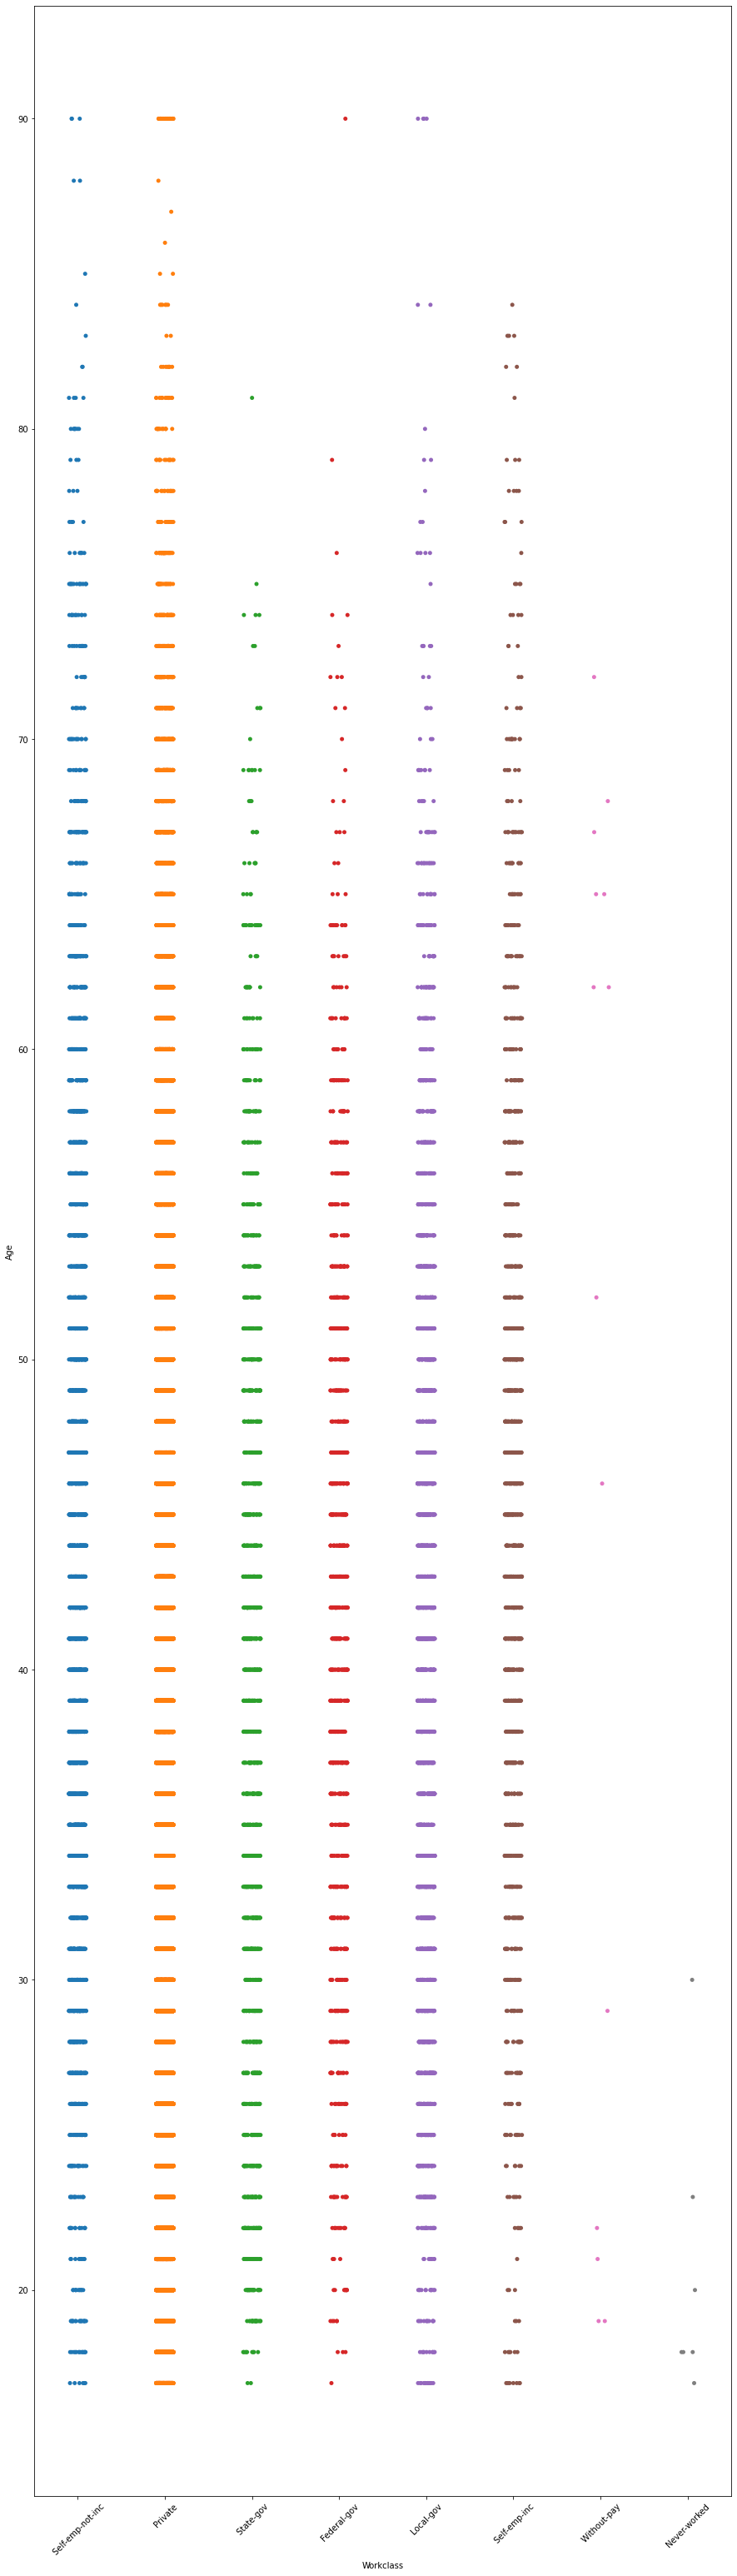

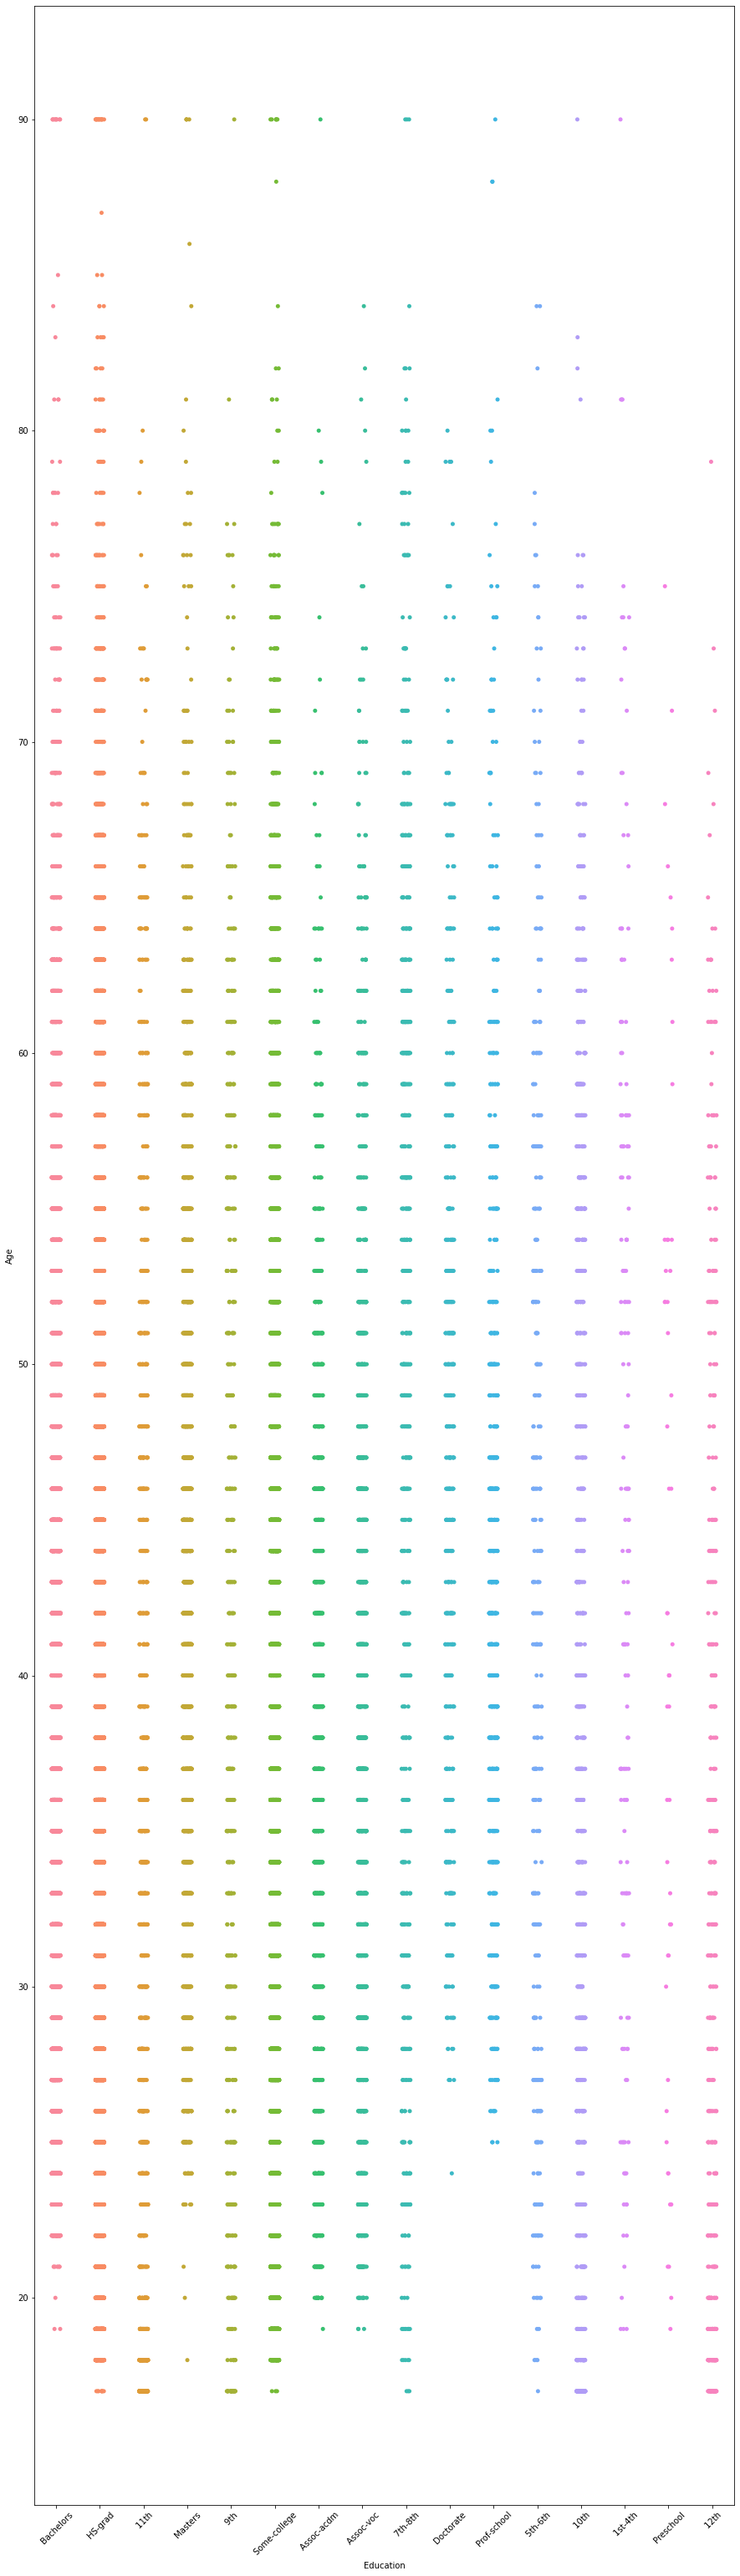

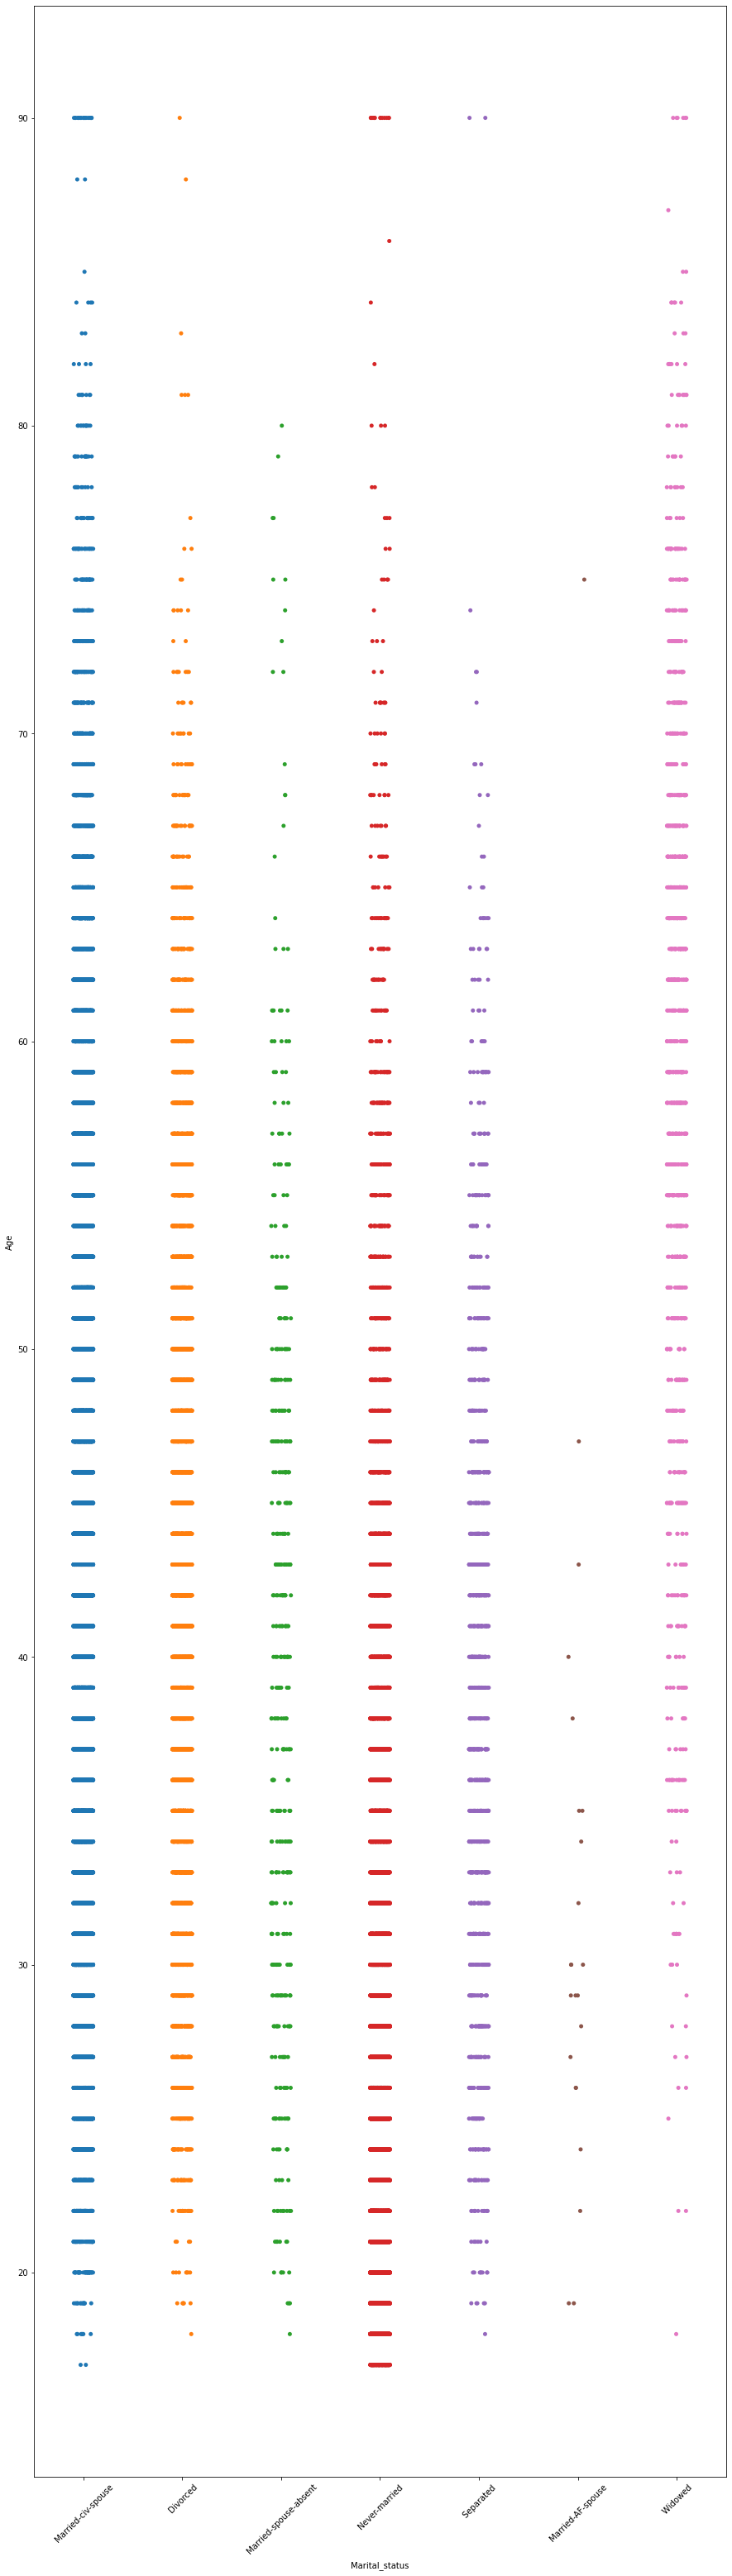

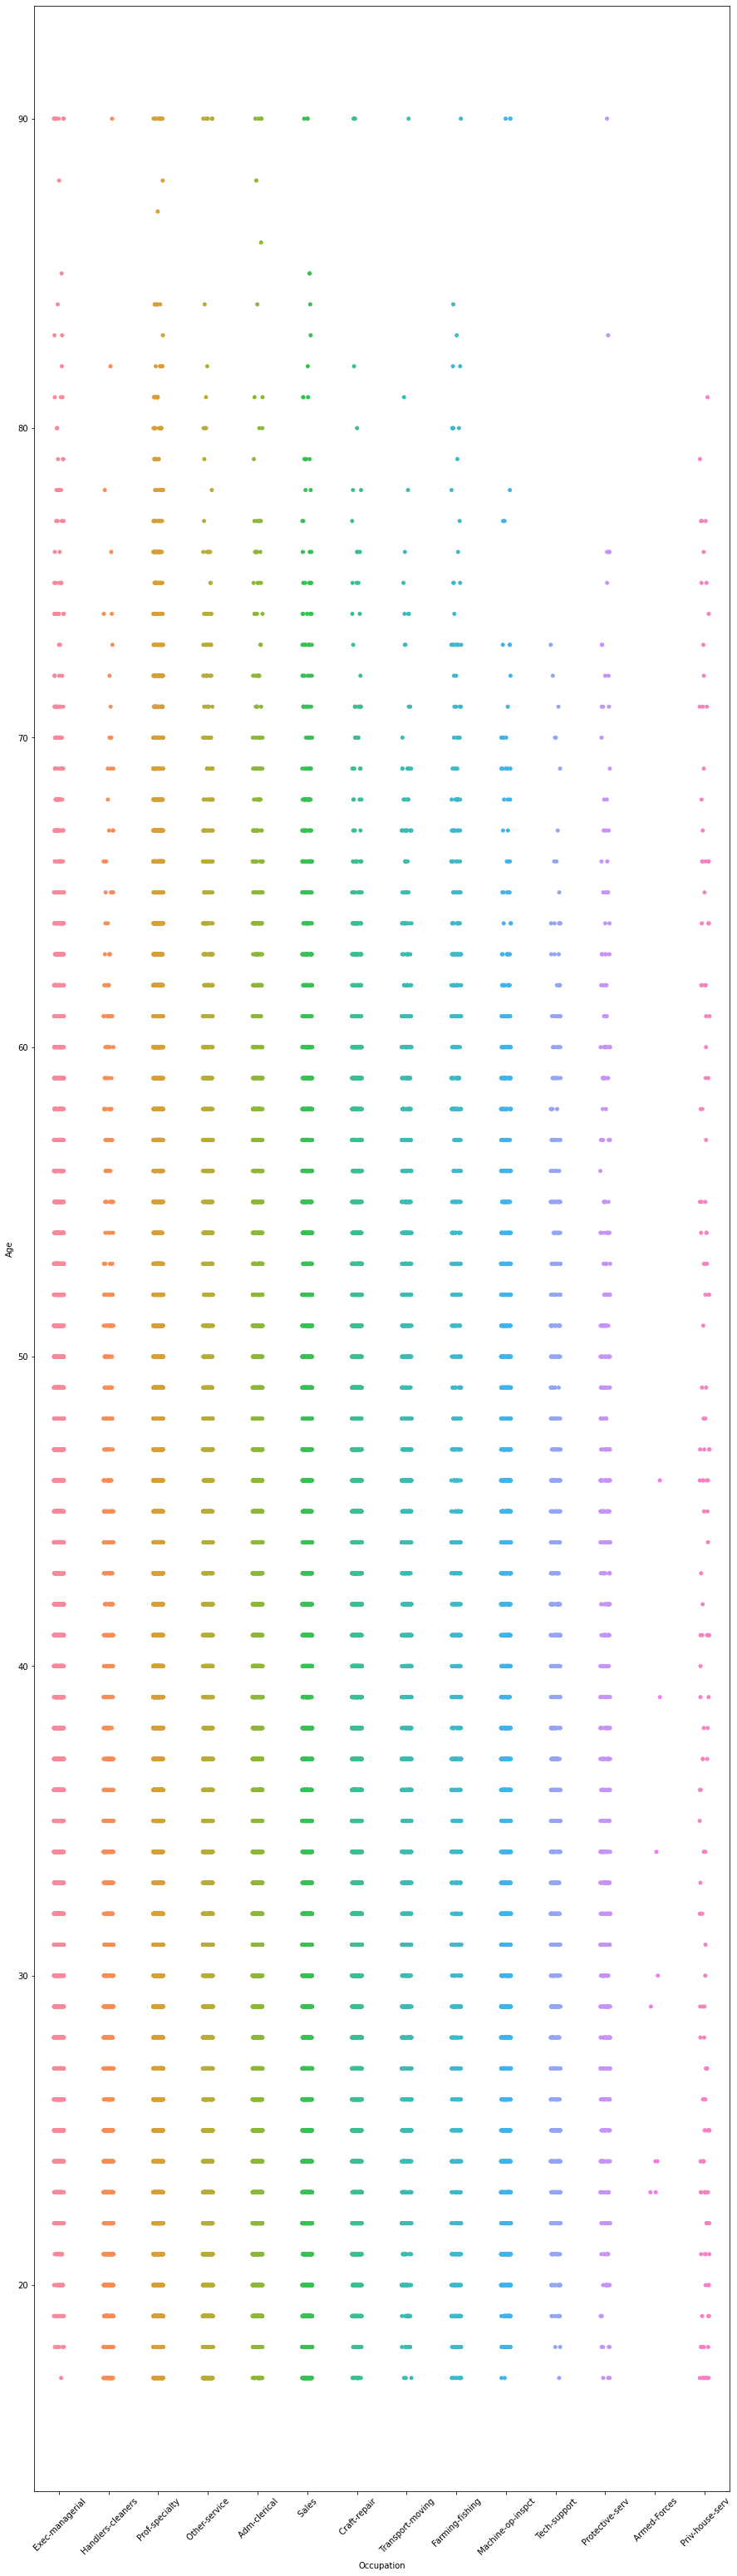

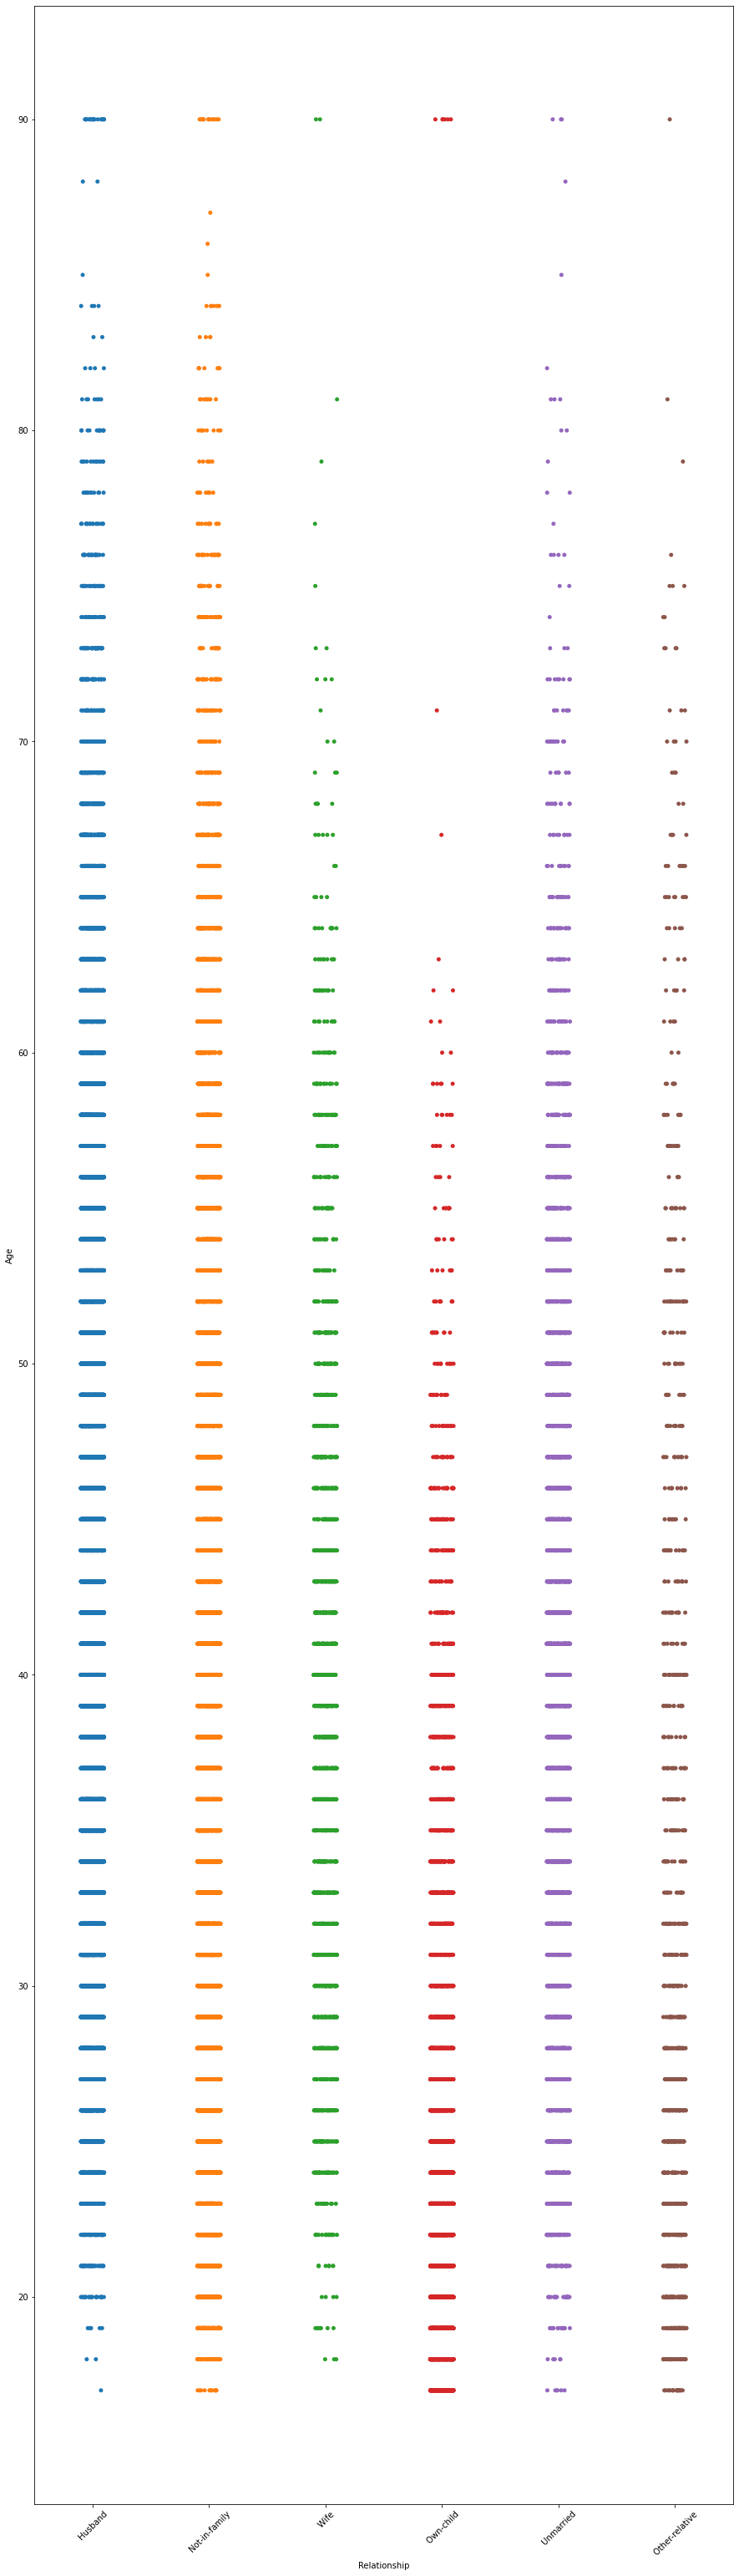

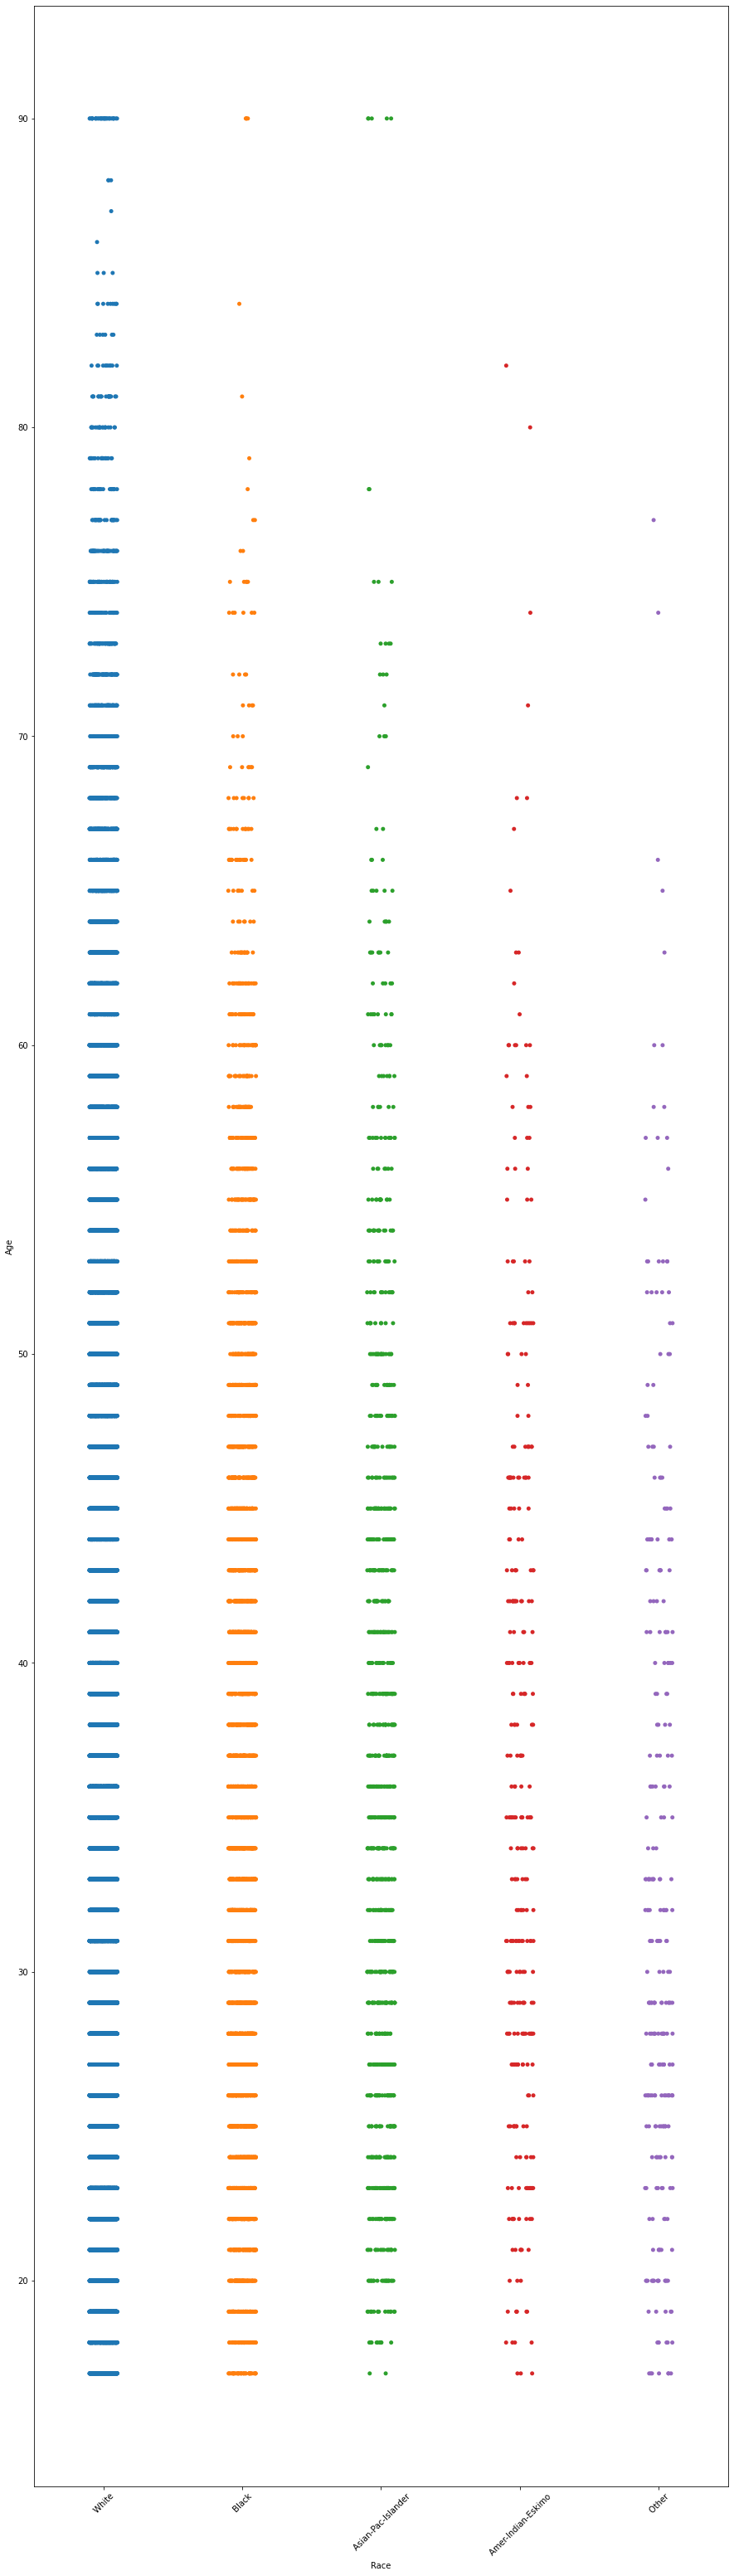

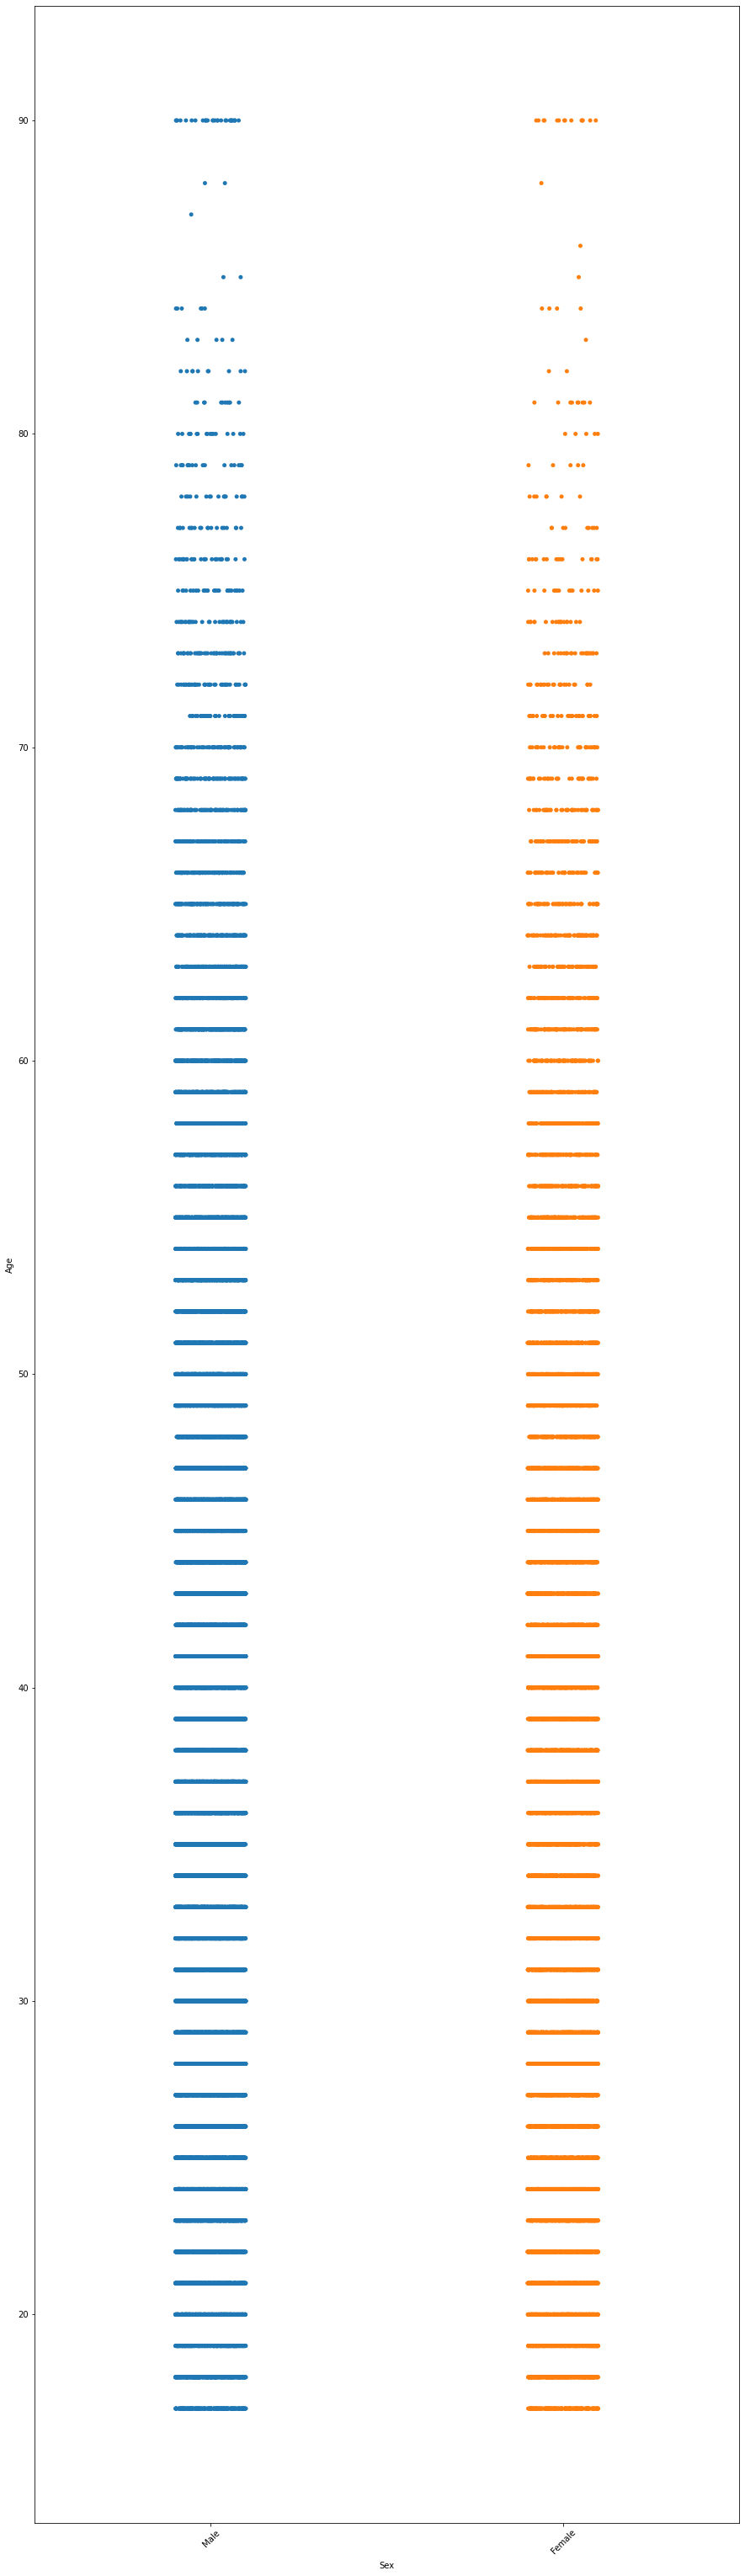

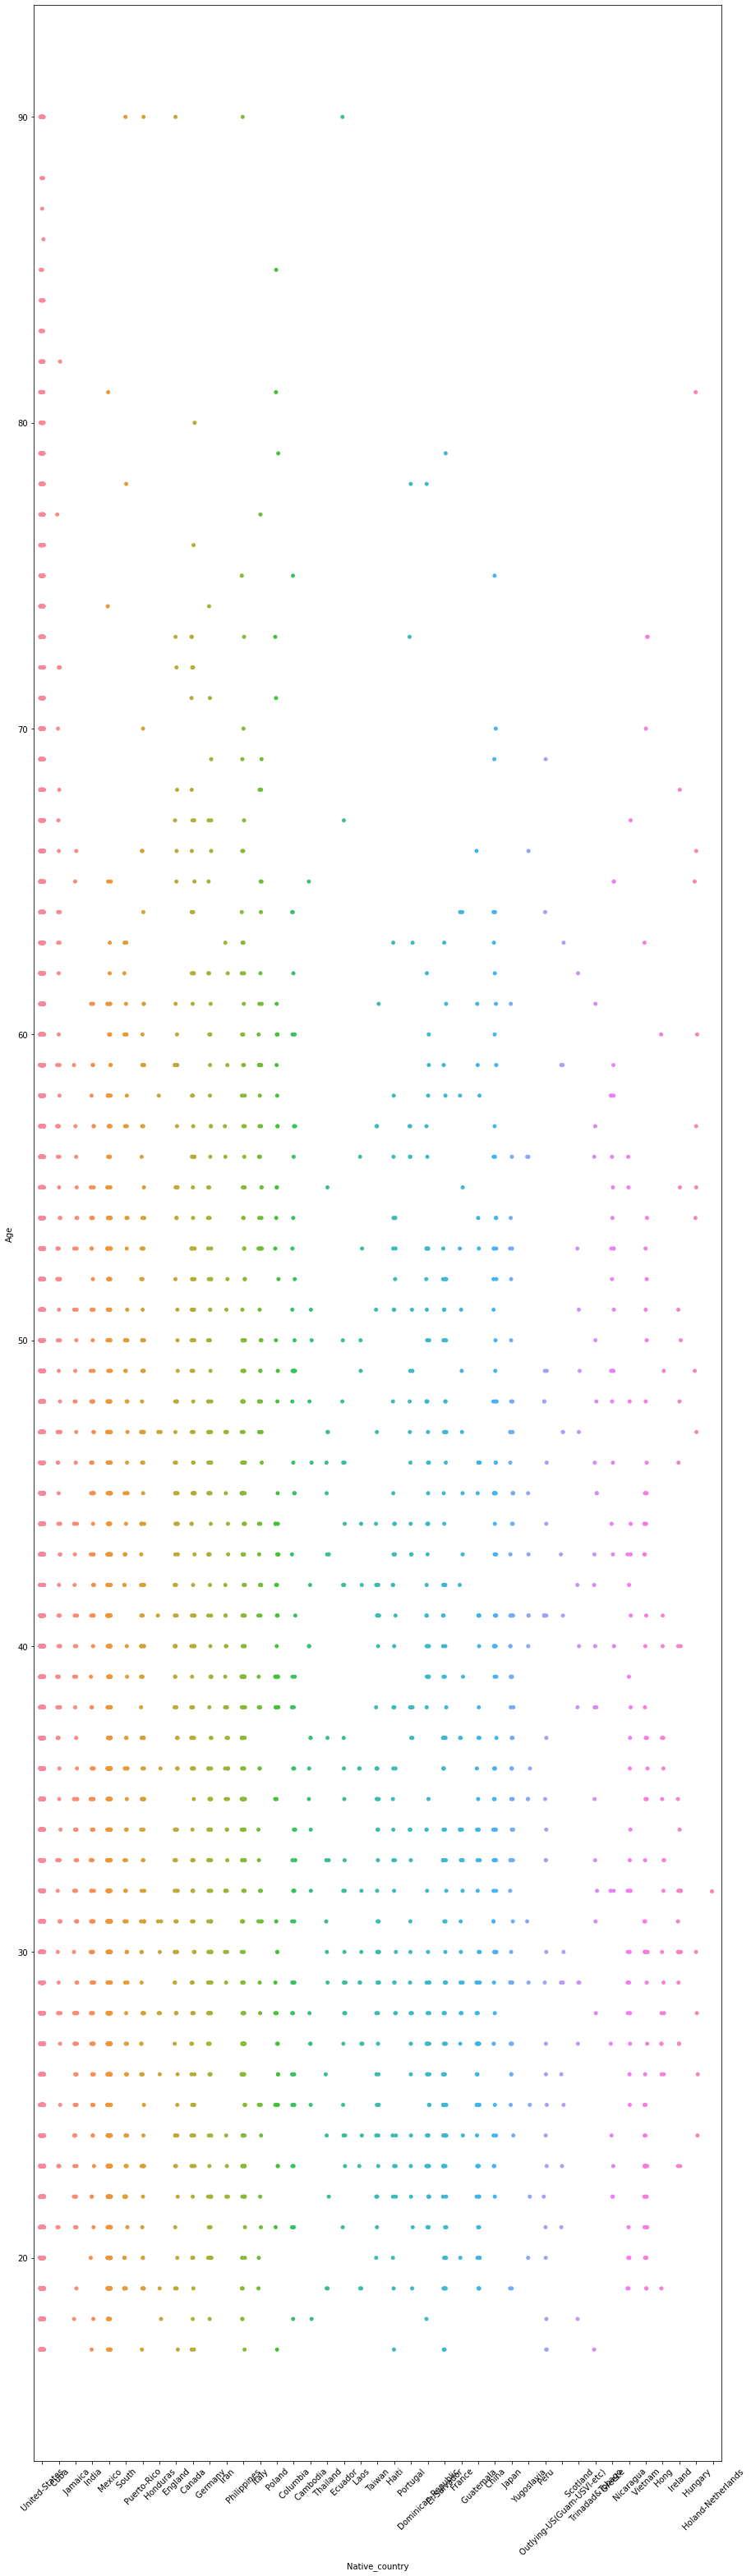

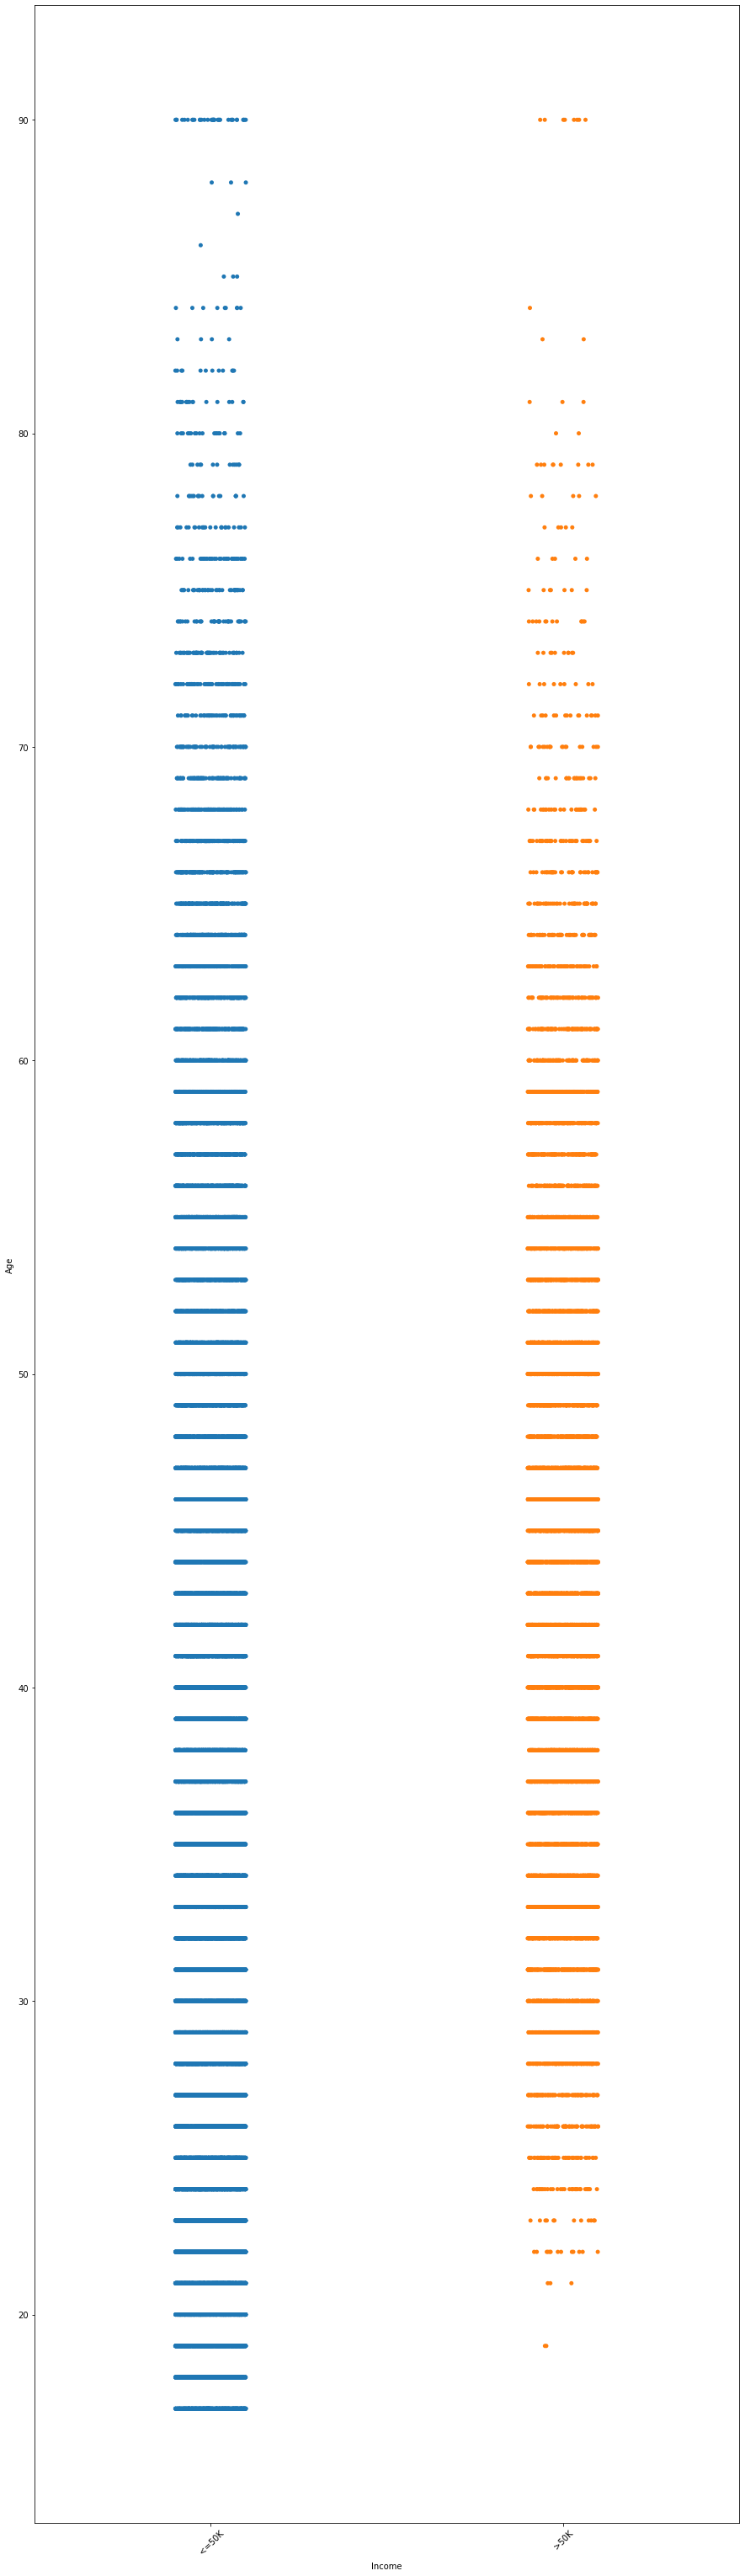

In [33]:
#age vs Categorical features
for i in cen_income[catagorical]:
    plt.figure(figsize=(15,55))
    graph=sns.stripplot(x=i,y='Age',data=cen_income)
    plt.xticks(rotation=45)
    

Individuals working in the government secctor have atmost age 70 to 80 with few outliers which must be the retirement age for them. There are no individuals who do not work after age of 30. There are no individuals of age >70 belonging to the pre school education category while Doctorates and proffessors appear from late 20's as they have to study for more years to get to that level of education. Same is the case with education num, as the education number increases age also is increased. There are no people after the age of 50 in the married to armed forces category with just a few outliers. Widowed category has seen increase as the age age seem to increase, there are very few widows at an early age. There are less people with high age from other races than the white race. There are more no. of working men at higher age than women. There are very few people belonging from other countries with high age.

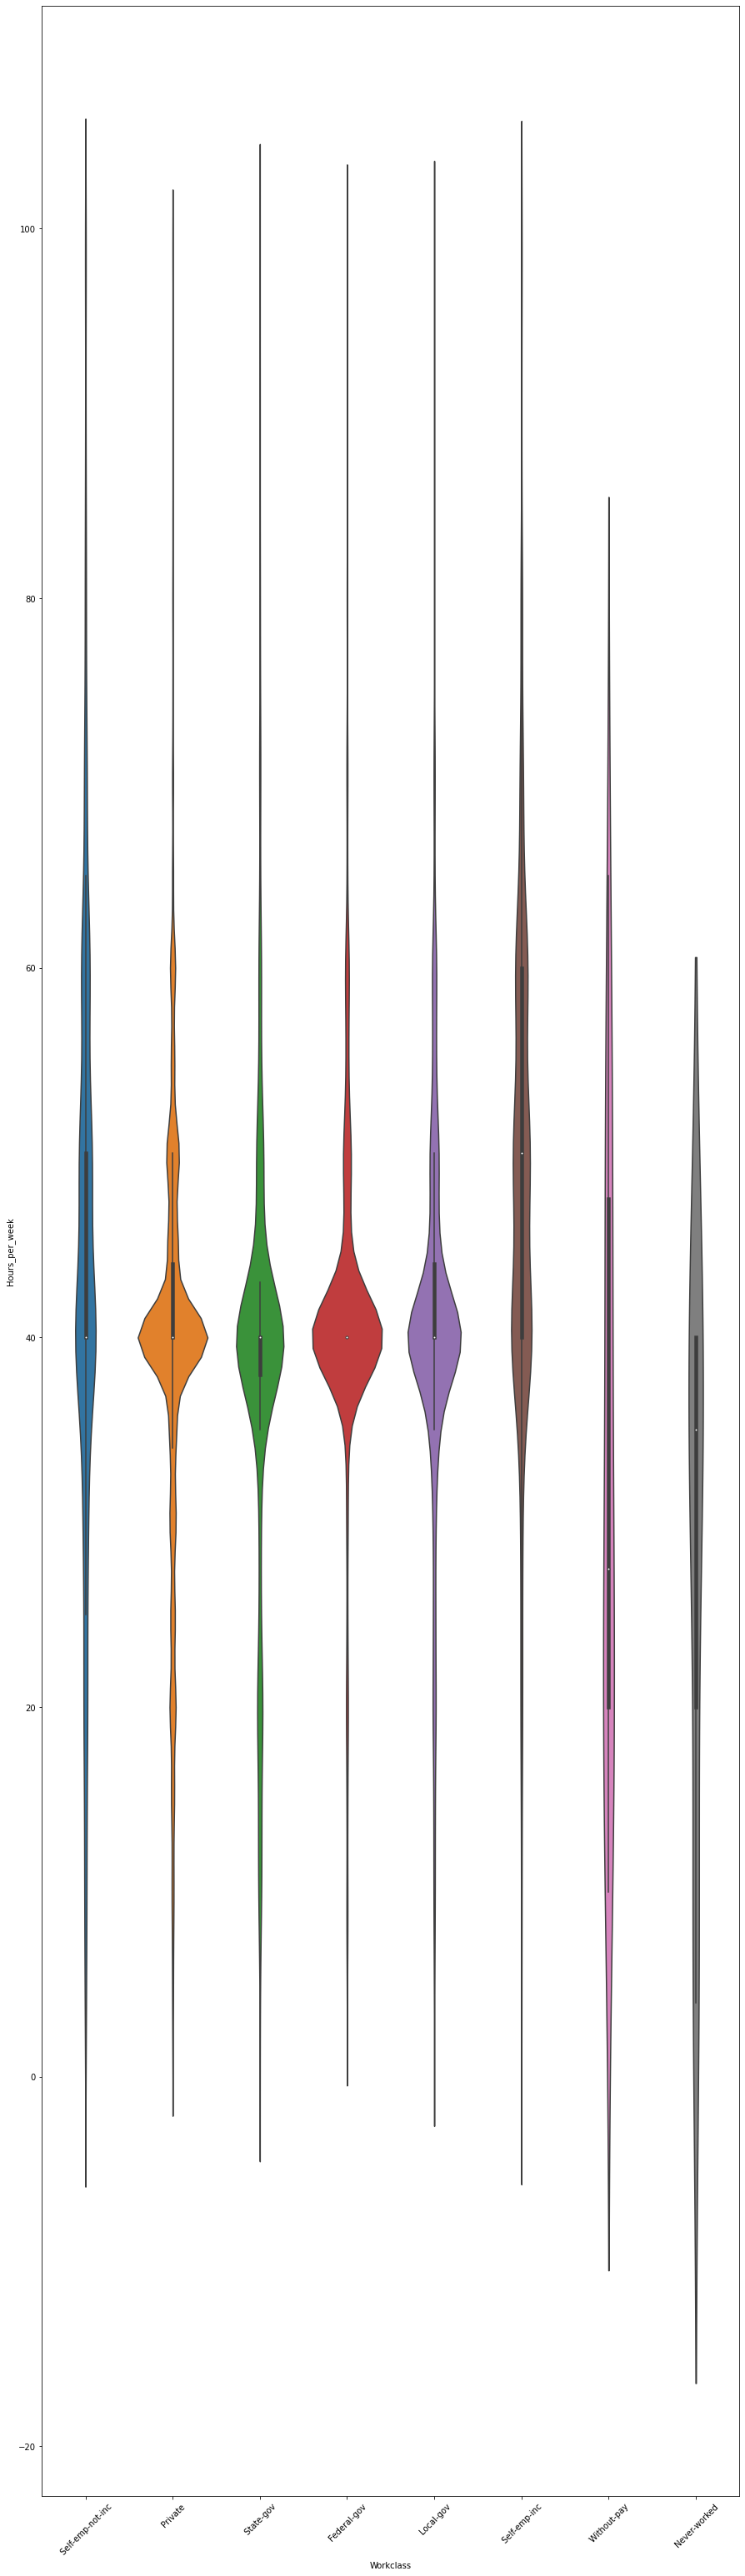

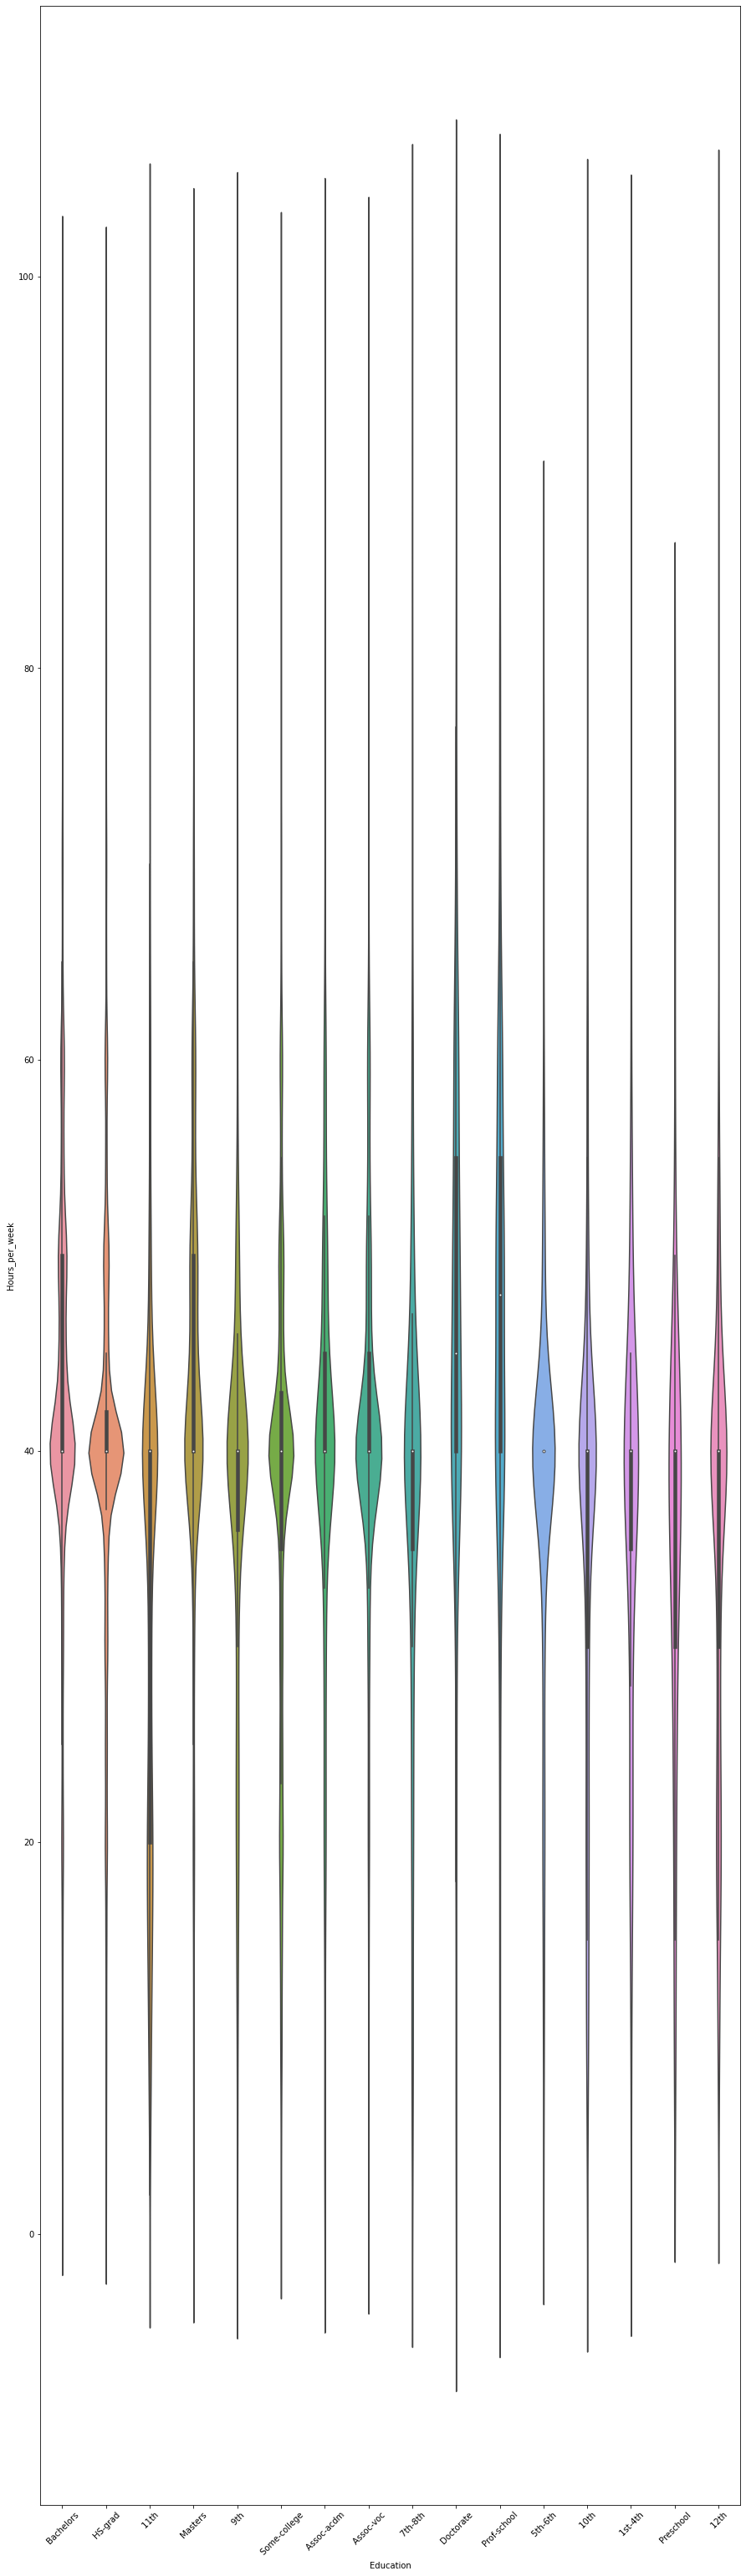

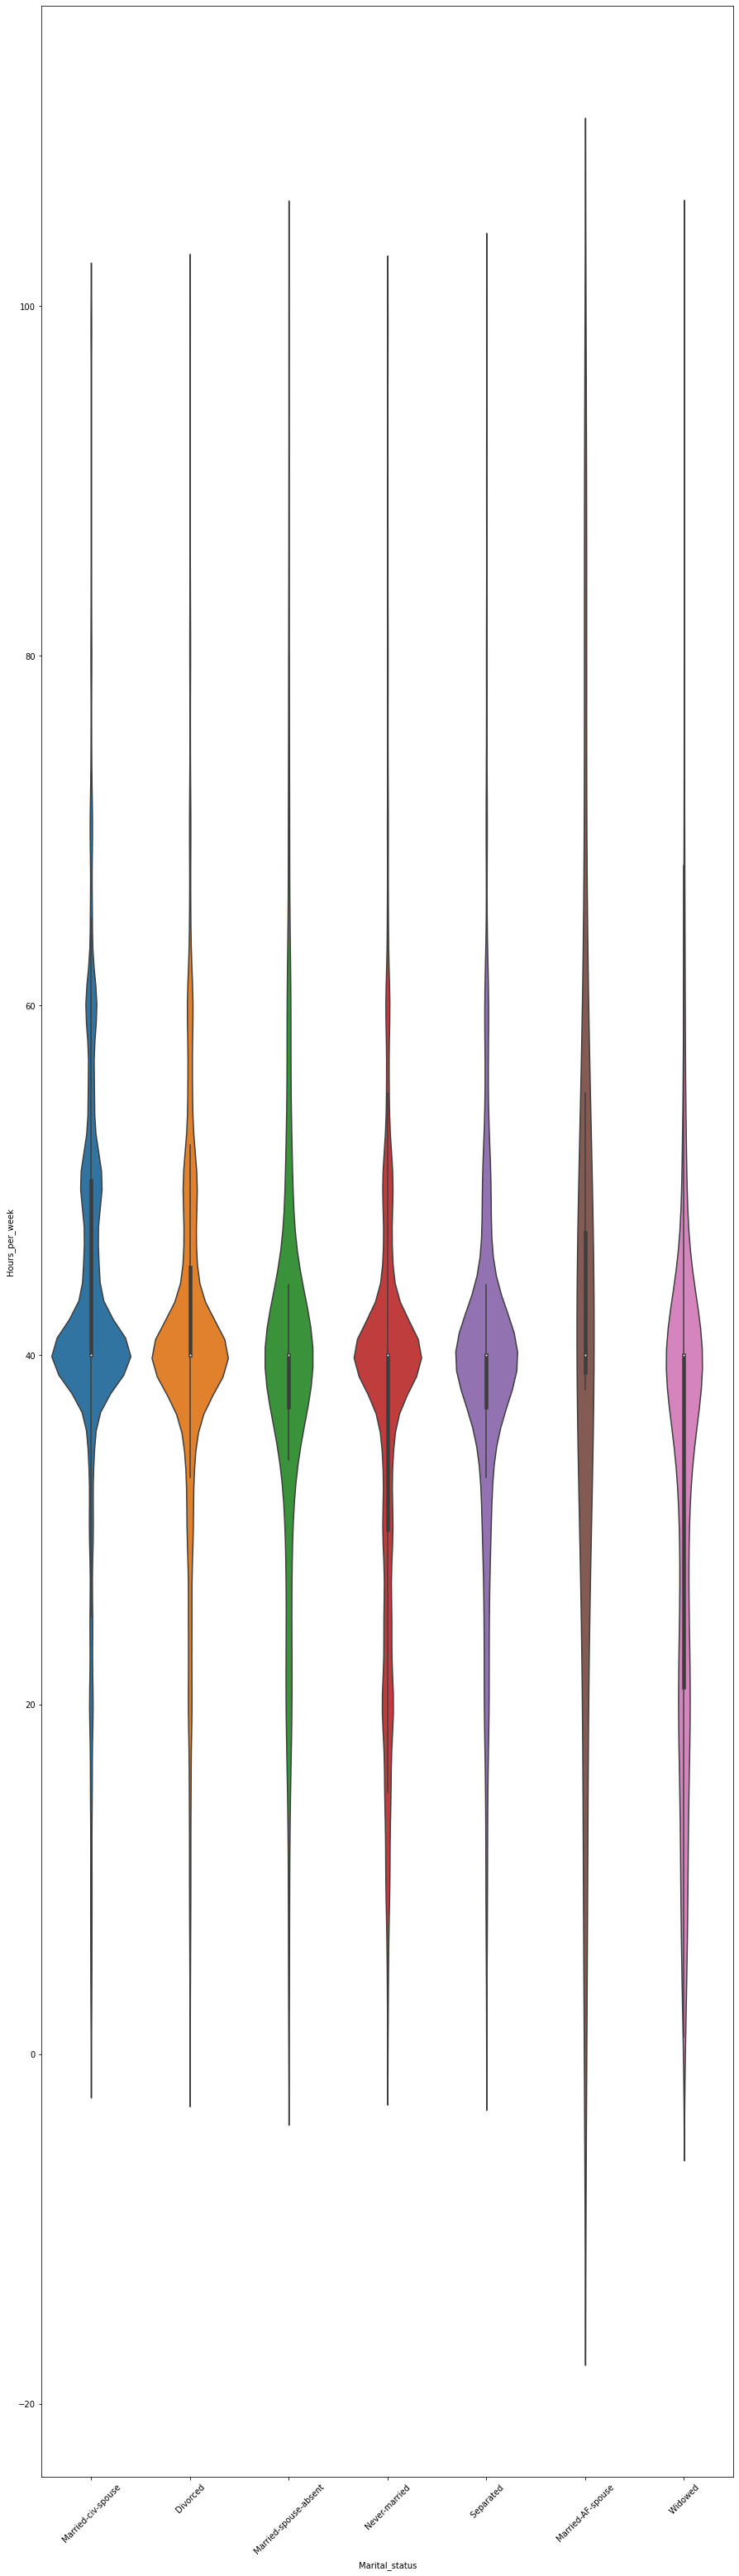

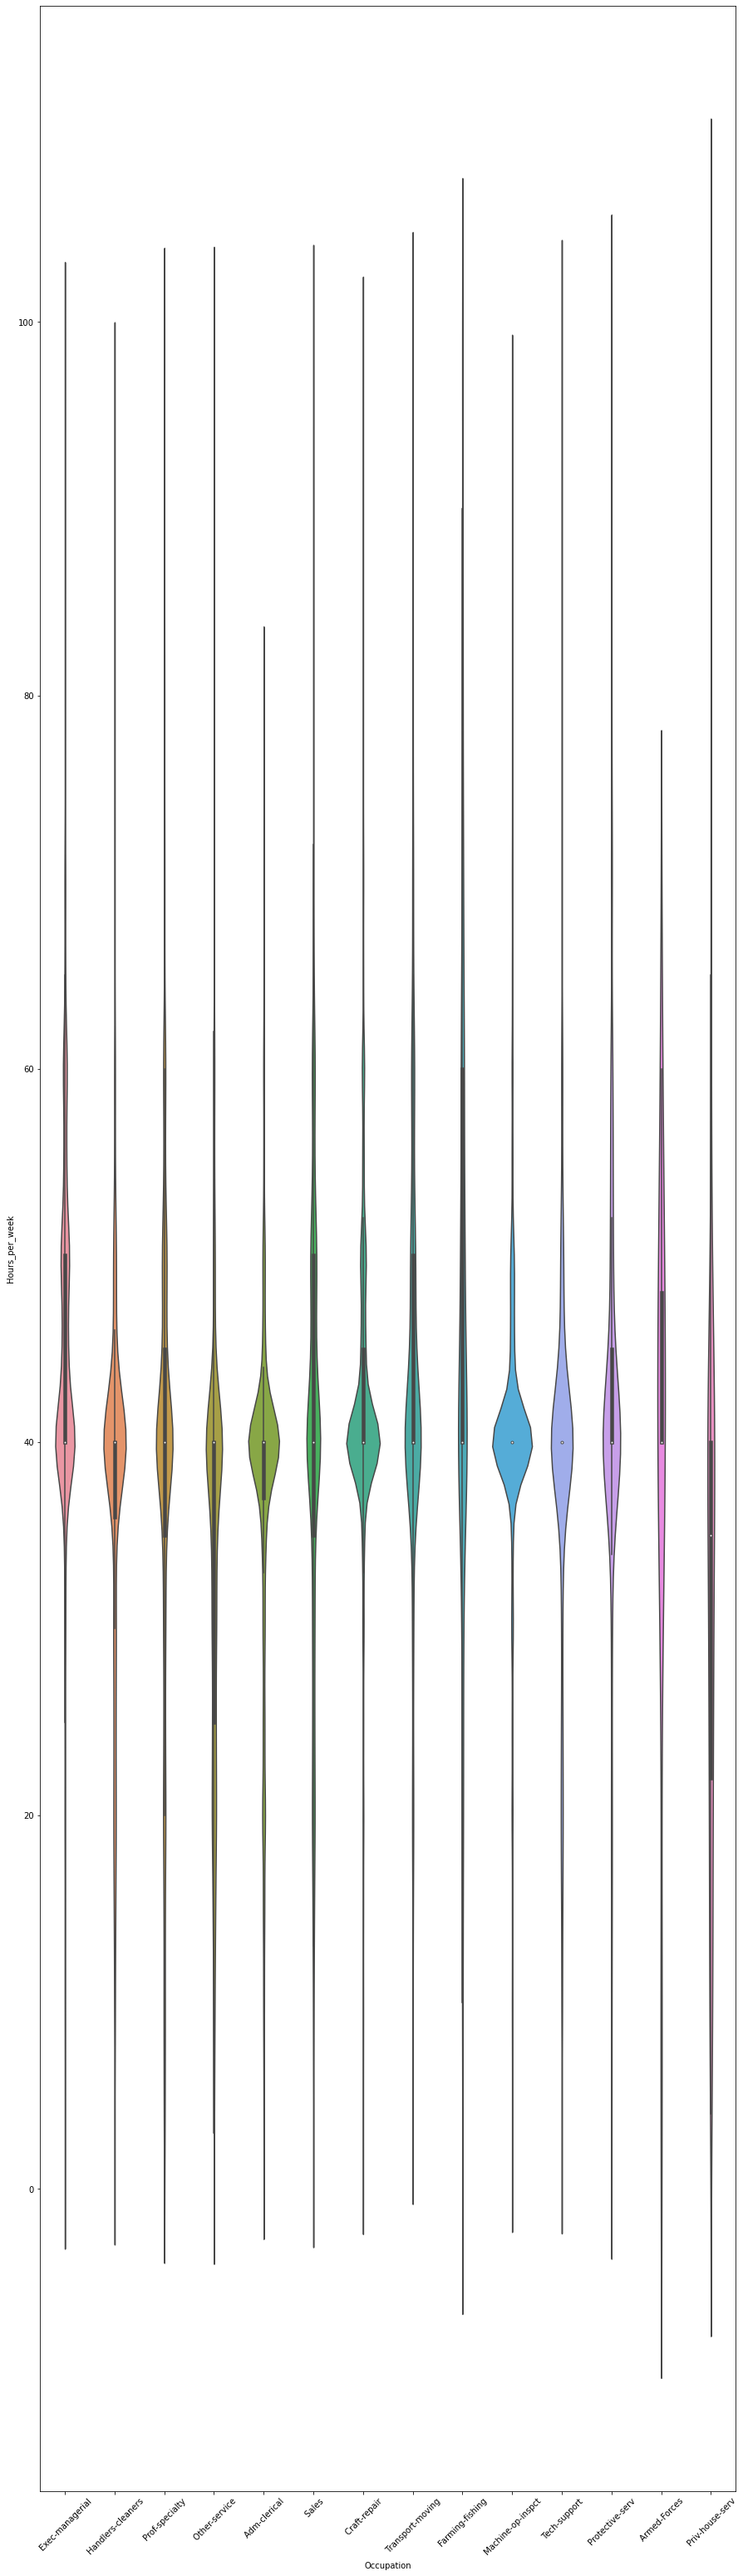

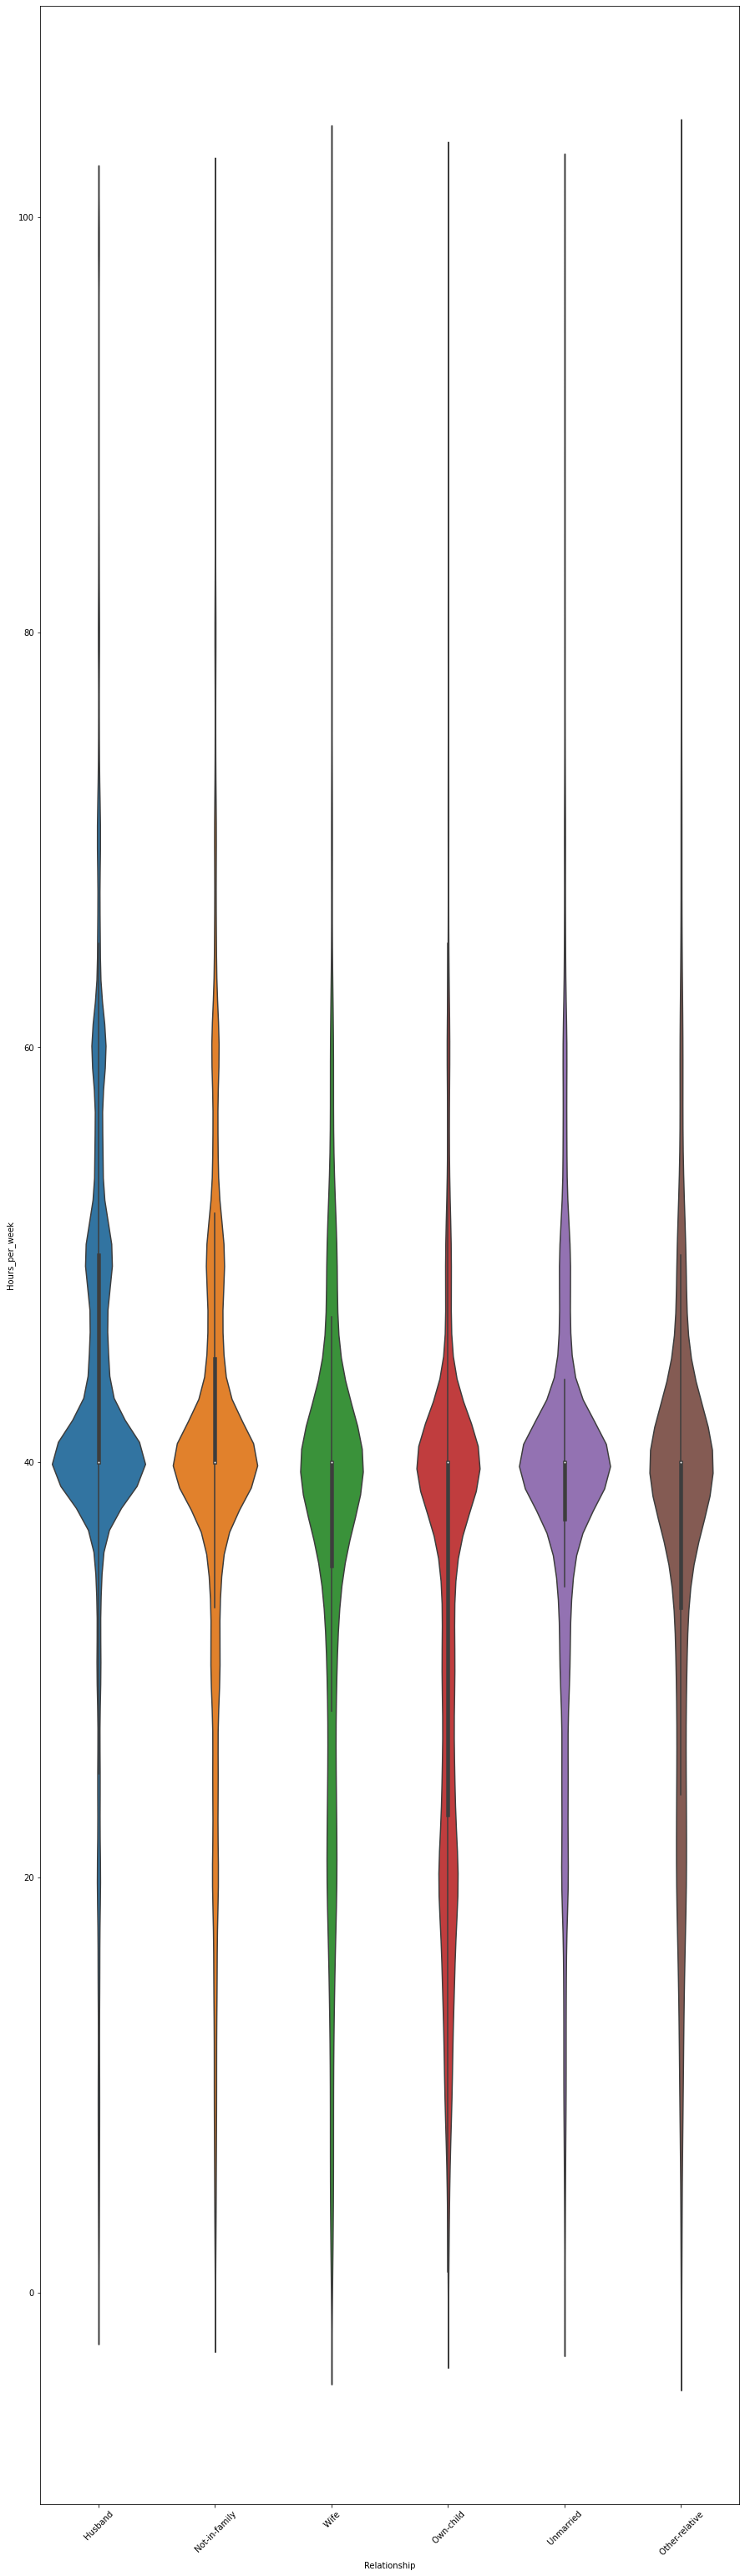

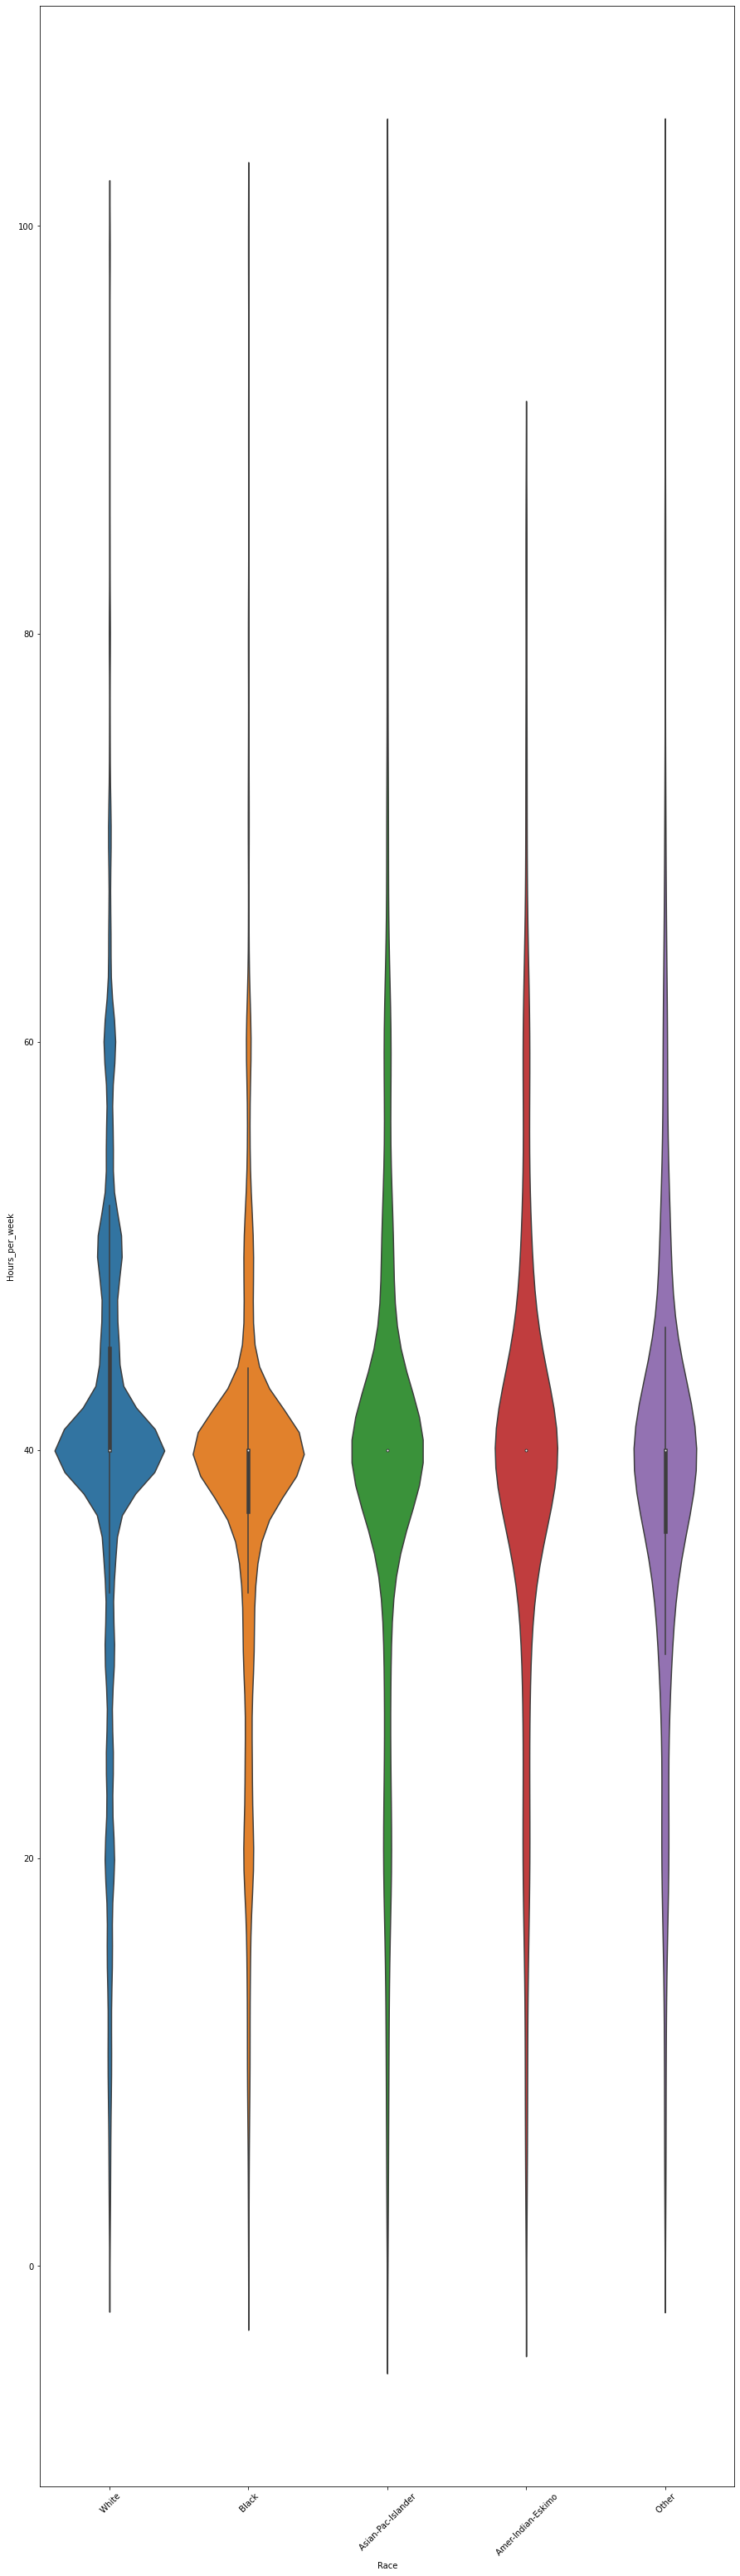

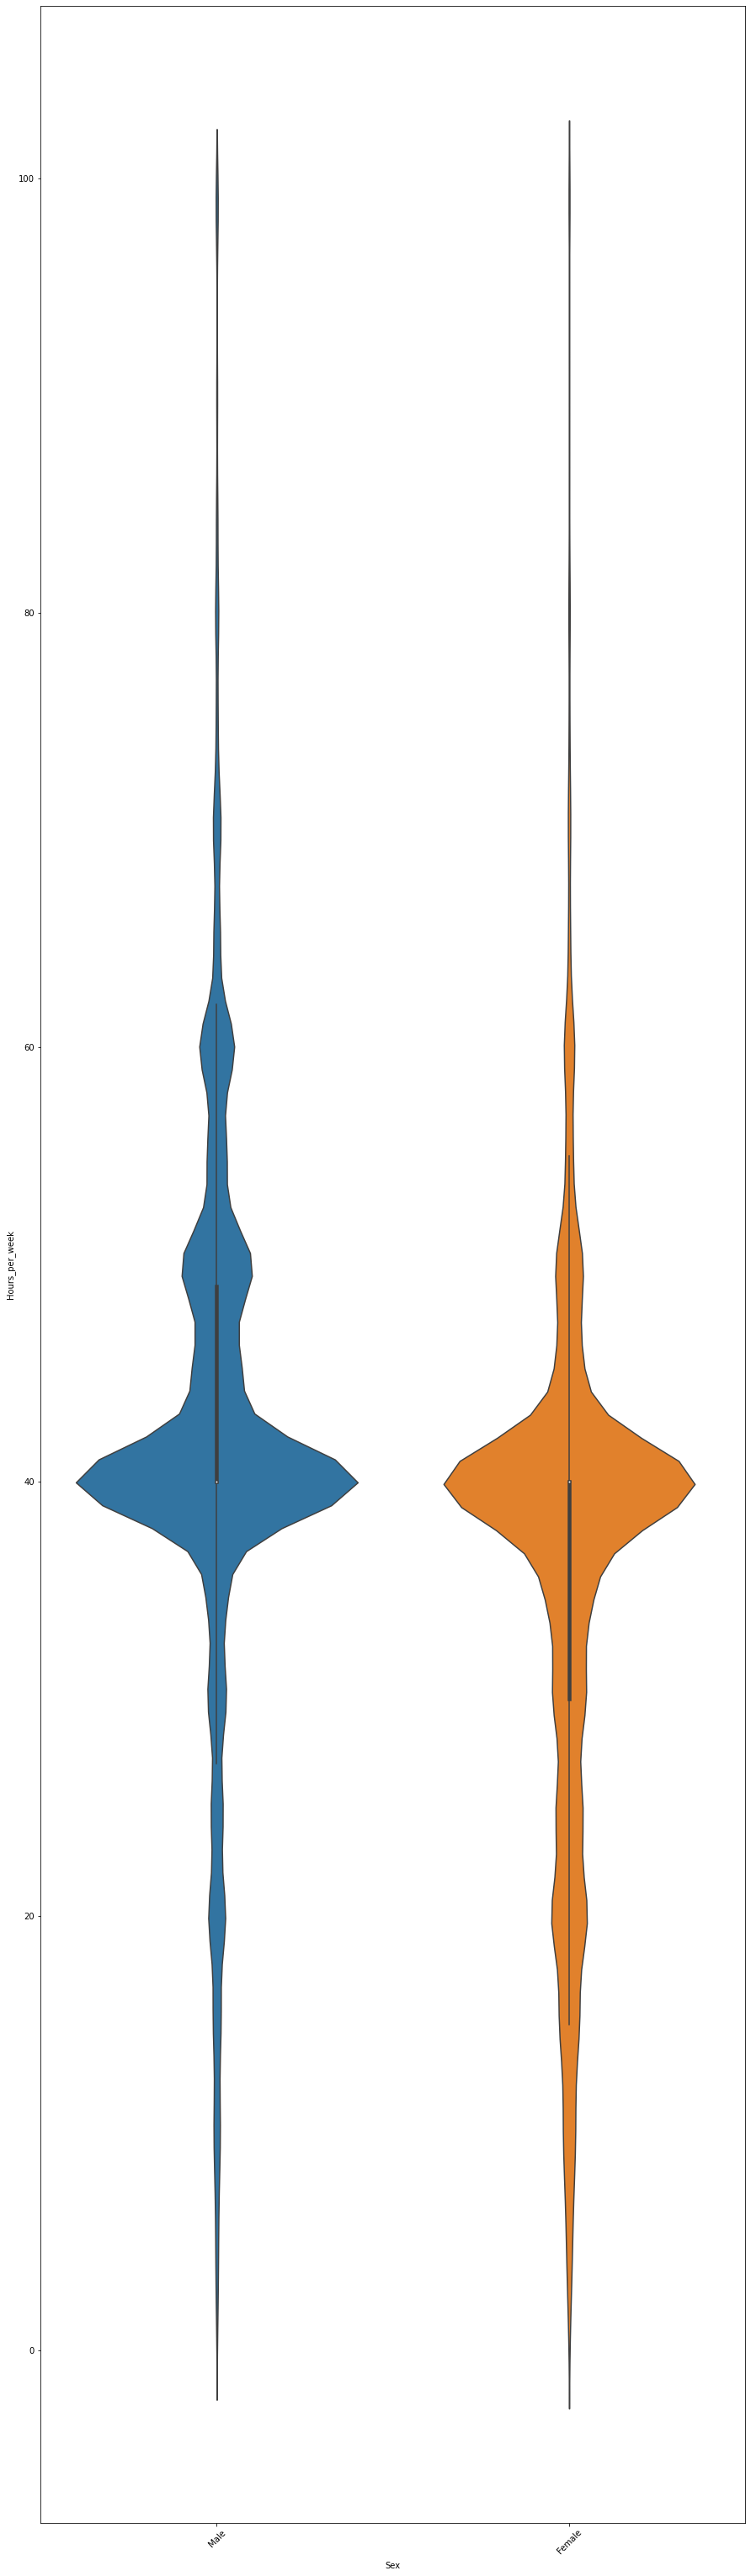

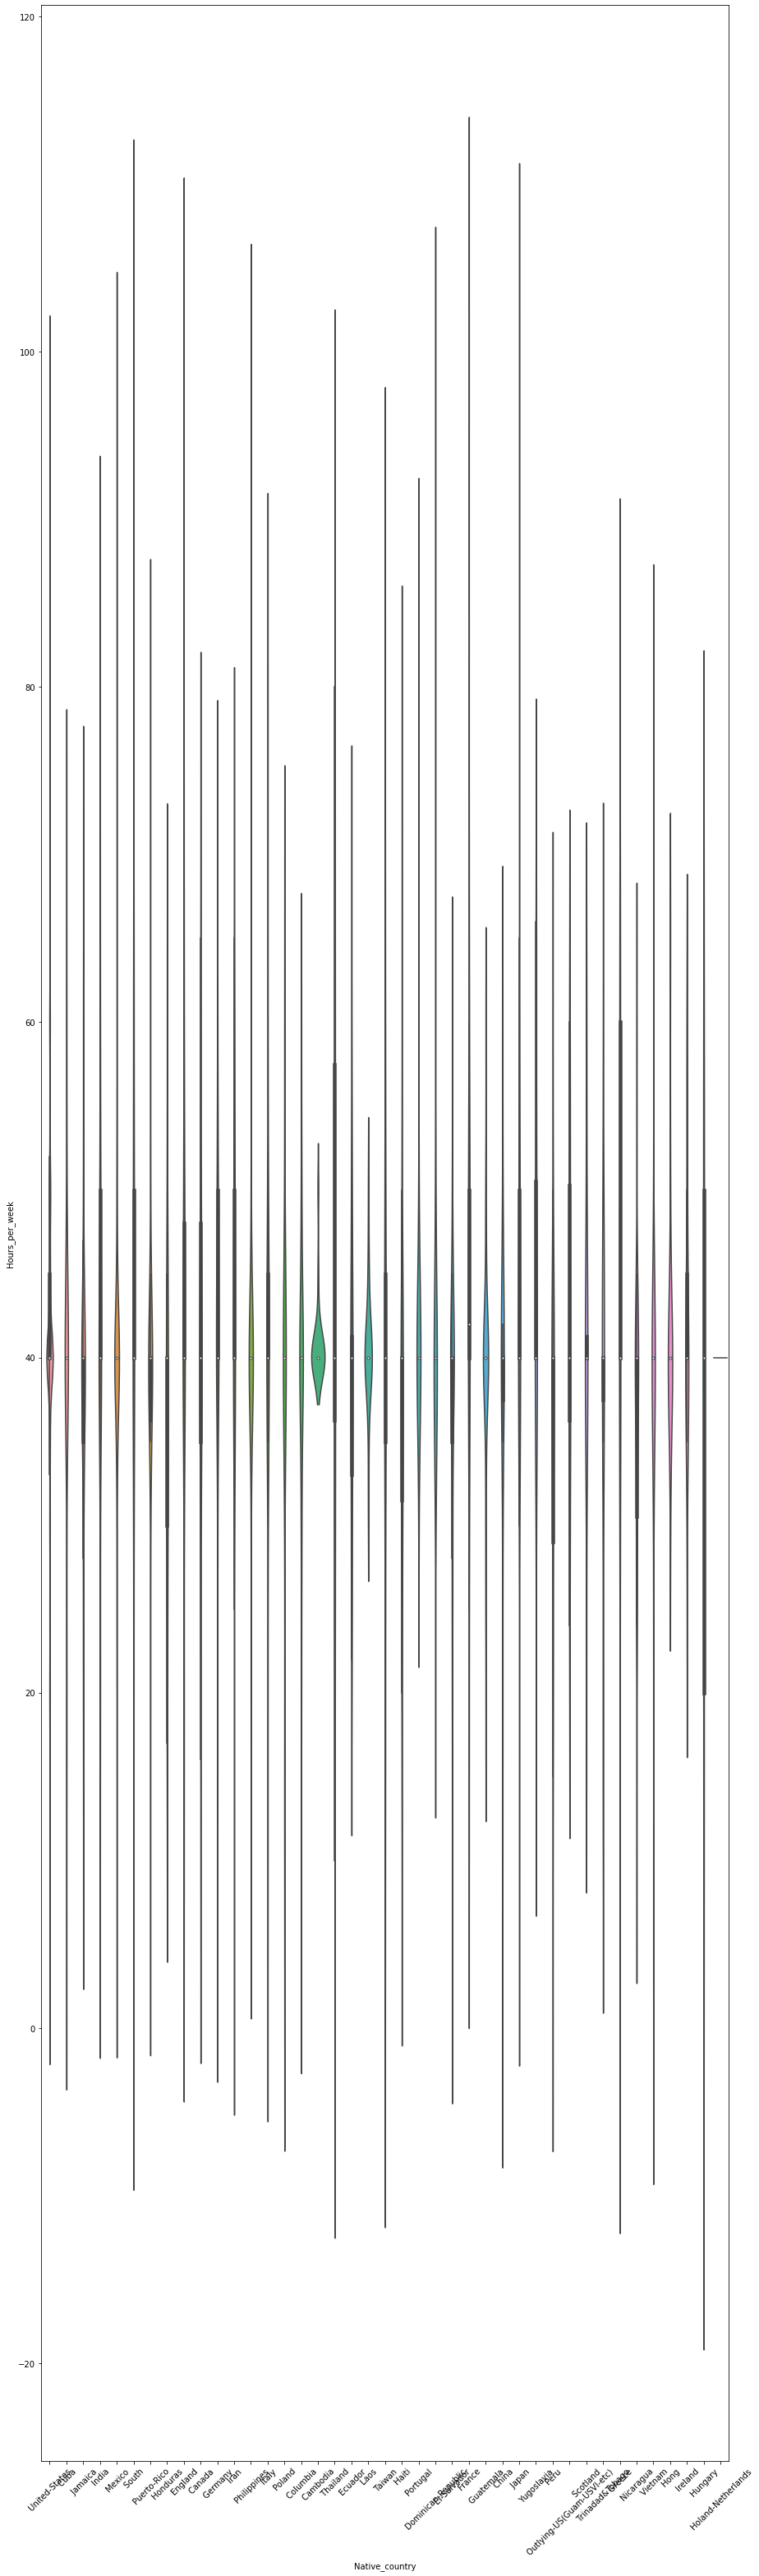

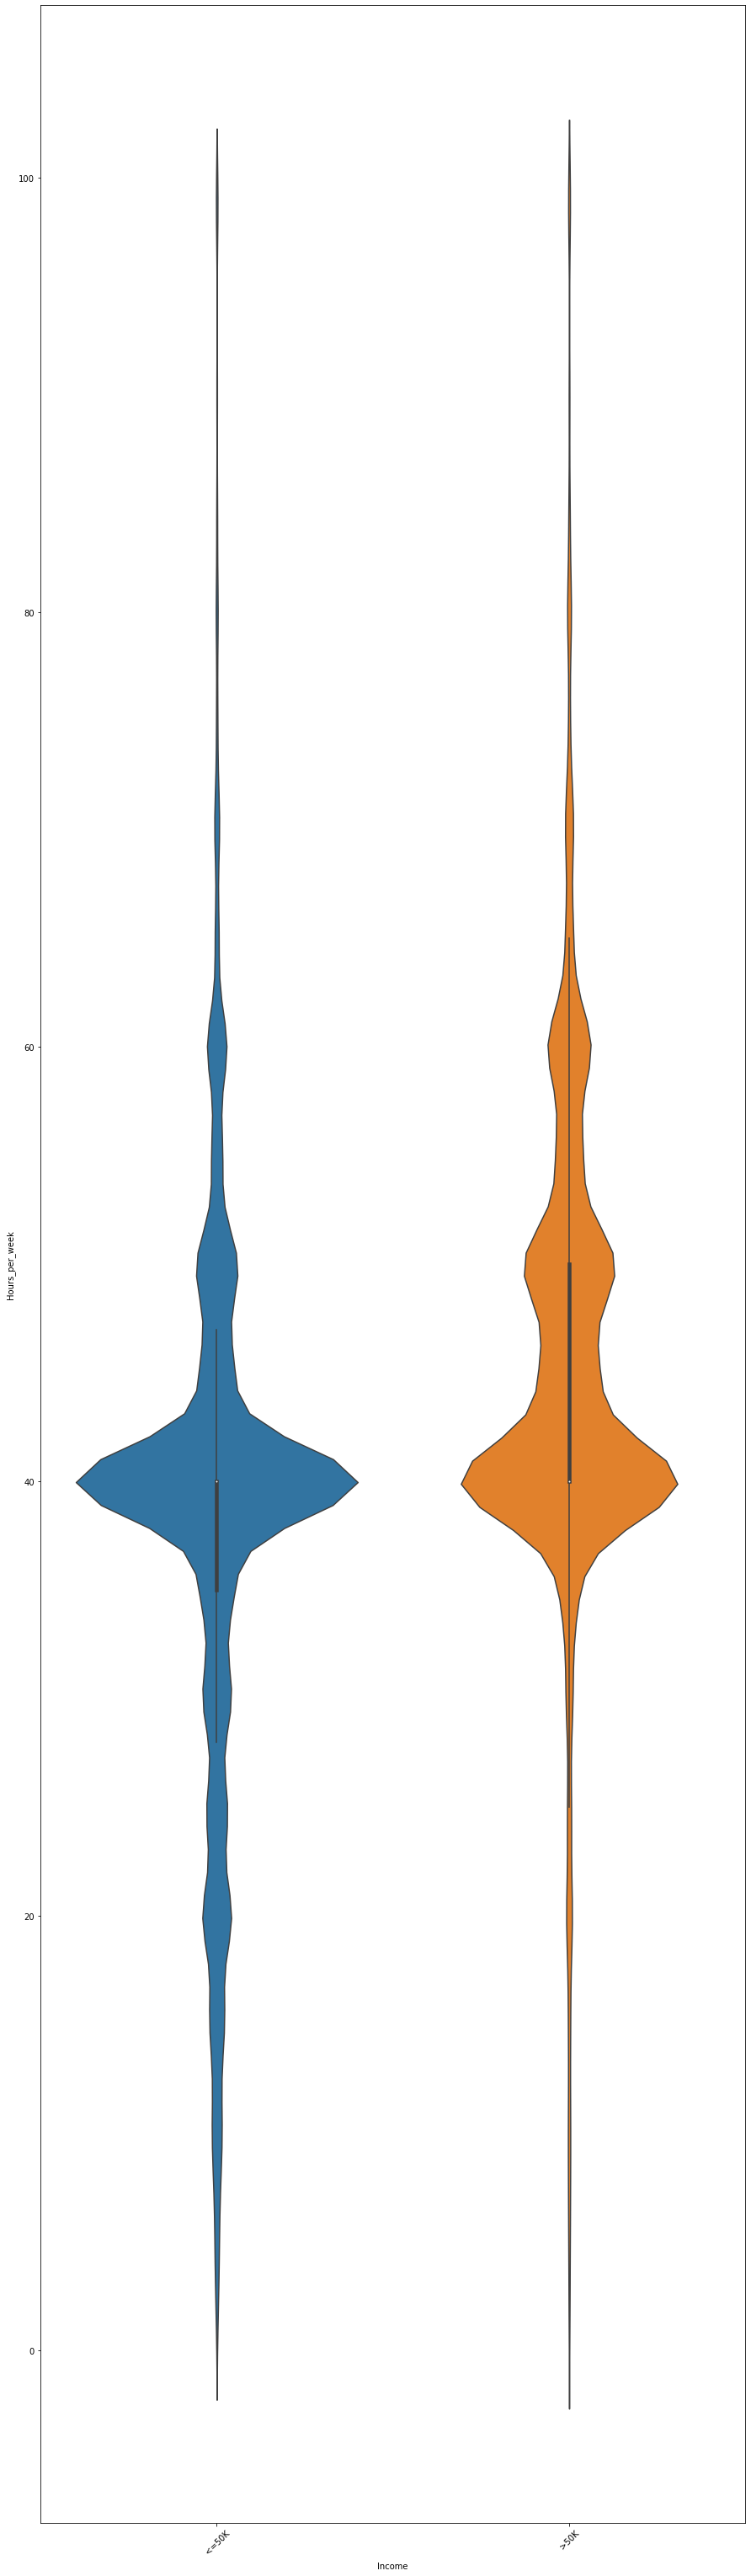

In [34]:
#Hours per week vs categorical Feature

for i in cen_income[catagorical]:
    plt.figure(figsize=(15,55))
    graph=sns.violinplot(x=i,y='Hours_per_week',data=cen_income)
    plt.xticks(rotation=45)

Govt employees do not work more than 80 hours a week that also with rare cases. It is seen that people with less education worl more no. hours of the week which is quite logical. No armed force person works more than 60 hours a week while farmers and transport movers has working hours mean higher than other occupation. More no, of individuals who have relationship as own child have high density for working only 20 hous a week. Female works for less no. of hours as compared to men.

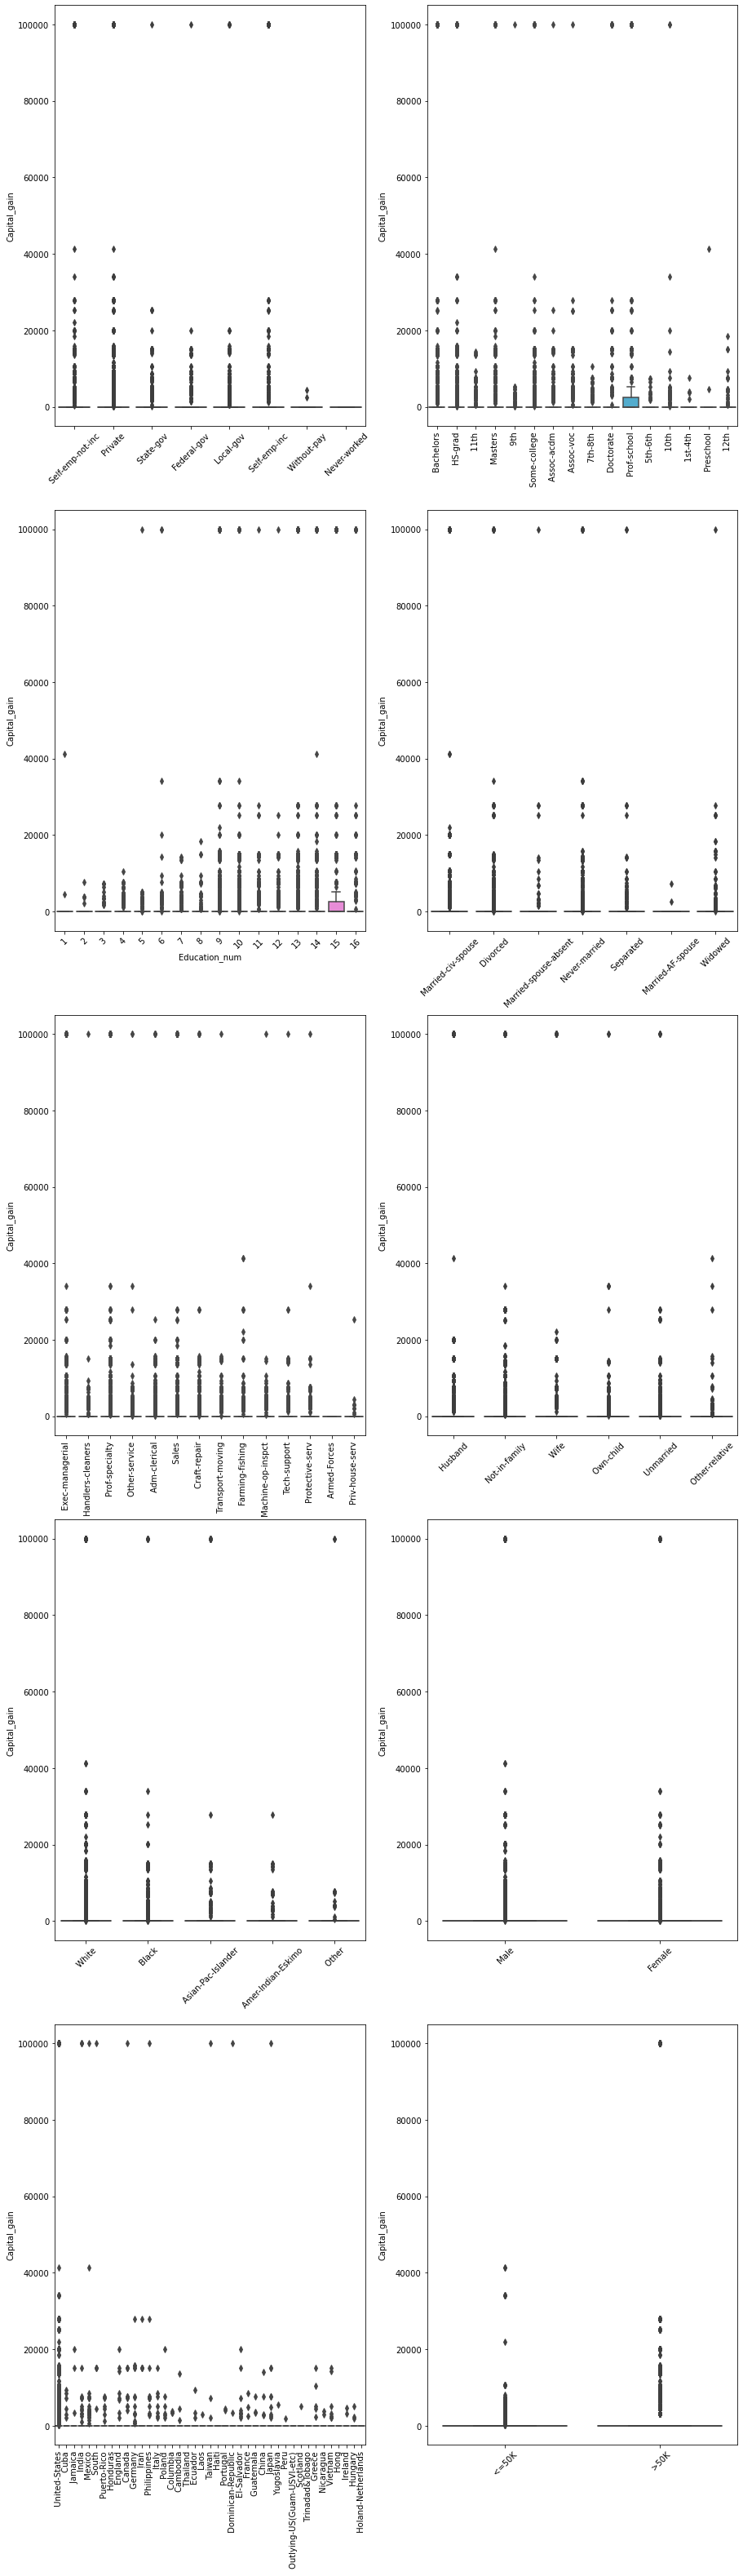

In [35]:
#Capital gain vs categorical Feature
cat=[feature for feature in cen_income.columns if cen_income[feature].nunique()<45]

fig,ax=plt.subplots(5,2,figsize=(15,55))
r=0
c=0
for i,n in enumerate(cat):
    if i%2==0 and i>0:
        r+=1
        c=0
    graph=sns.boxplot(x=n,y='Capital_gain',data=cen_income,ax=ax[r,c])
    if n=='Native_country' or n=='Occupation' or n=='Education':
        graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)
    else:
        graph.set_xticklabels(graph.get_xticklabels(),rotation = 45)
    if n!='Education_num':
        graph.set(xlabel=None)
    c+=1

Highest capital gains are seen in individuals belonging to private or self employed workclass. There are more no. of prof-school than any other education category with highest capital gains. There are individuals even with preschool knowledge have capital gain more than 40000. As the education level increases capital gain also increases. People from the armed forces have the least capital gain while most prominent capitals gains are found in people who are in the sales occupation. Whites have more capital gains than any other race. Men also seem to have high capital gains as compared to females. There are many people from <=50k income category who have captital gains more than 10000.

## Multivariate Analysis

Text(0, 0.5, 'Average age')

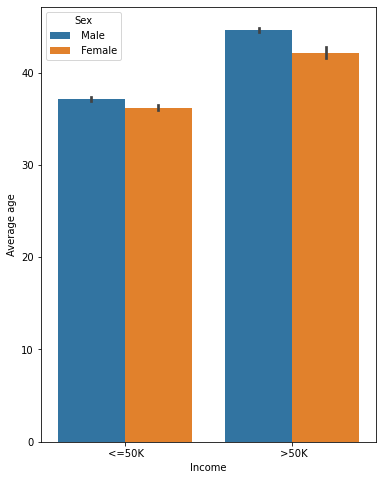

In [36]:

plt.figure(figsize=(6,8))
sns.barplot(x='Income',y='Age',hue='Sex',data=cen_income)
plt.ylabel('Average age')

As the age increases people are paid more but males are paid more than females.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

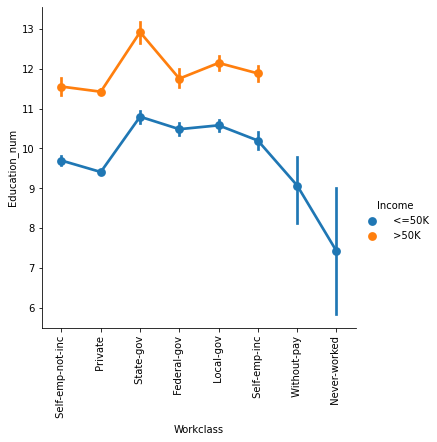

In [37]:
sns.factorplot(x='Workclass',y='Education_num',hue='Income',data=cen_income)
plt.xticks(rotation=90)

Some people belonging to a particular workclass might have less education and some workclass might require more education level, but no matter whatever workclass, people in the same workclass, if they have higher education level they earn more. It is also to be noticed that there is no person from without pay and never worked workclass category who earn more than 50k which is logical.

(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

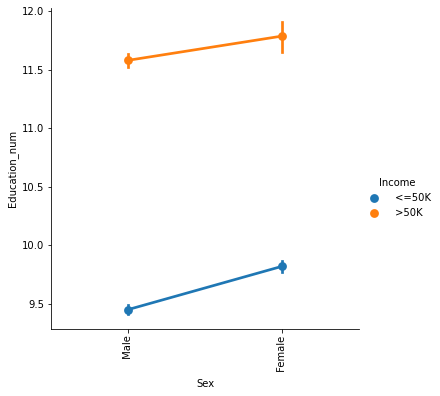

In [38]:
sns.factorplot(x='Sex',y='Education_num',hue='Income',data=cen_income)
plt.xticks(rotation=90)

Females with higher education level earn equal to men having less education level than them irrespective of any income category they fall.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

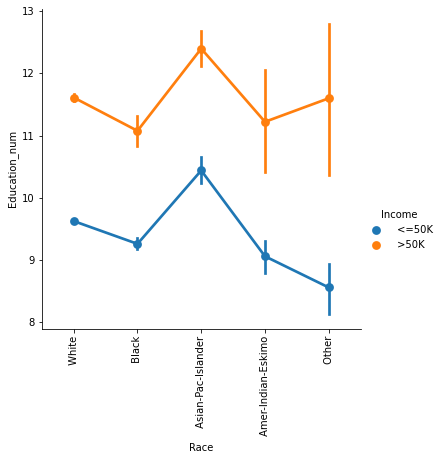

In [39]:
sns.factorplot(x='Race',y='Education_num',hue='Income',data=cen_income)
plt.xticks(rotation=90)

Asian pacific race have comparatively more education than the fellows who earn same as much as they do, belonging to other races. Indians and some other races earn >50k with lowest education level.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

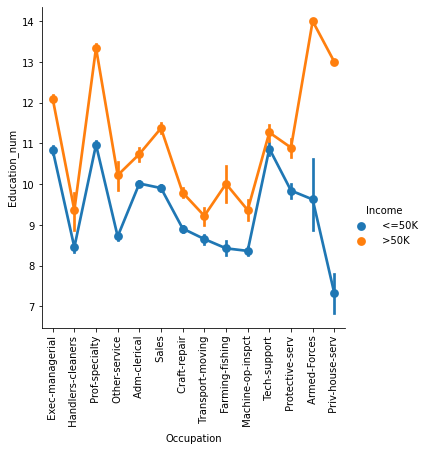

In [40]:
sns.factorplot(x='Occupation',y='Education_num',hue='Income',data=cen_income)
plt.xticks(rotation=90)

People with highest education level belong to armed forces, but people with even education level quite low, who belong to handlers cleaners, transport moving occupation earn as much as they do. Same is the case with prof speciality. occupation of private house service who earn >50k and <50k have the highest education level difference while prof speciality have the minimum difference.

<AxesSubplot:xlabel='Age', ylabel='Hours_per_week'>

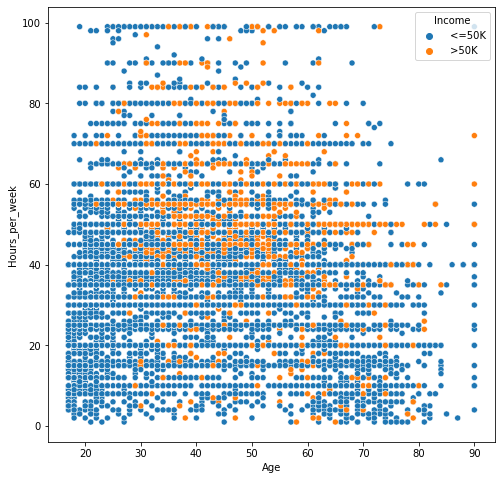

In [41]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Age',y='Hours_per_week',hue='Income',data=cen_income)

From the scatterplot between age, hours.per.week and income, we observe that a person needs to be >30 to be earning more than 50K, else needs to work at least 60 hours.per.week to earn >50K.

In [42]:
cen_income.corr()

Age    Fnlwgt  Education_num  Capital_gain  Capital_loss  \
Age             1.000000 -0.076646       0.036527      0.077674      0.057775   
Fnlwgt         -0.076646  1.000000      -0.043159      0.000437     -0.010259   
Education_num   0.036527 -0.043159       1.000000      0.122627      0.079932   
Capital_gain    0.077674  0.000437       0.122627      1.000000     -0.031614   
Capital_loss    0.057775 -0.010259       0.079932     -0.031614      1.000000   
Hours_per_week  0.068756 -0.018770       0.148127      0.078409      0.054256   

                Hours_per_week  
Age                   0.068756  
Fnlwgt               -0.018770  
Education_num         0.148127  
Capital_gain          0.078409  
Capital_loss          0.054256  
Hours_per_week        1.000000

<AxesSubplot:>

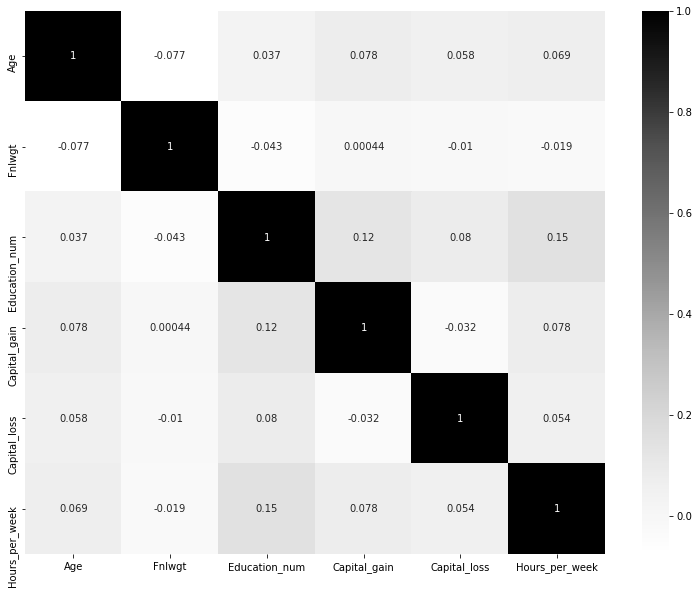

In [43]:
plt.figure(figsize=(13,10))
sns.heatmap(cen_income.corr(),annot=True,cmap='Greys')

There are only few features in the above heat map as most of them are of object type. From here we can see that the independent features don not have much correlation with each other i.e. no multicollinearity.

# Pre-processing

### Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
l=LabelEncoder()
o=OrdinalEncoder()

In [45]:
#We use ordinal encoder to Encode Independent features
for i in cen_income.columns:
    if cen_income[i].dtypes=='O' and i!='Income':
        cen_income[i]=o.fit_transform(cen_income[i].values.reshape(-1,1))

In [46]:
#We use label encoder to encode label 
cen_income['Income']=l.fit_transform(cen_income['Income'])

### Removing Outliers

In [47]:
from scipy.stats import zscore

In [48]:
#Method to find optimum threshold
def threshold():
    for i in np.arange(3,5,0.2):
        data=cen_income.copy()
        data=data[(z<i).all(axis=1)]
        loss=(cen_income.shape[0]-data.shape[0])/cen_income.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 


In [49]:
z=np.abs(zscore(cen_income))
threshold()

With threshold 3.0 data loss is 14.71%
With threshold 3.2 data loss is 11.12%
With threshold 3.4 data loss is 10.34%
With threshold 3.6 data loss is 9.69%
With threshold 3.8 data loss is 8.88%
With threshold 4.0 data loss is 8.37%
With threshold 4.2 data loss is 7.58%
With threshold 4.4 data loss is 6.02%
With threshold 4.6 data loss is 4.64%
With threshold 4.8 data loss is 3.29%


From above we choose threhold as 4.2 as data is precious and we cannot afford to lose more than 8% of data.

In [50]:
cen_income=cen_income[(z<4.2).all(axis=1)]

### Removing Skewness

In [51]:
cen_income.skew()

Age               0.572681
Workclass         0.093285
Fnlwgt            0.854743
Education        -0.936148
Education_num    -0.304697
Marital_status   -0.042492
Occupation        0.007277
Relationship      0.757784
Race             -2.370304
Sex              -0.695804
Capital_gain      5.493385
Capital_loss      7.762938
Hours_per_week   -0.081683
Native_country   -4.765050
Income            1.330808
dtype: float64

In [52]:
#using Power transformer to remove skewness
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [53]:
for i in continues:
    if np.abs(cen_income[i].skew())>0.5:
        cen_income[i]=pt.fit_transform(cen_income[i].values.reshape(-1,1))

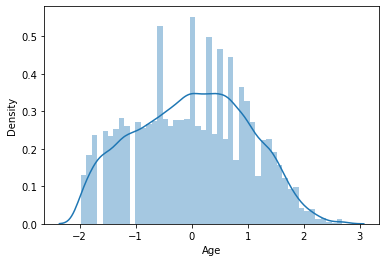

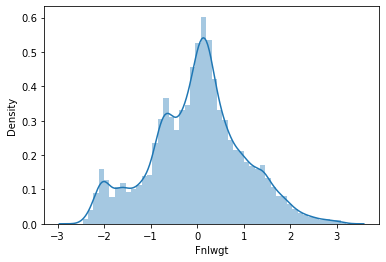

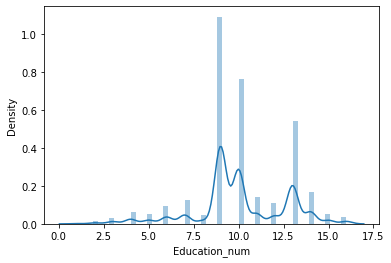

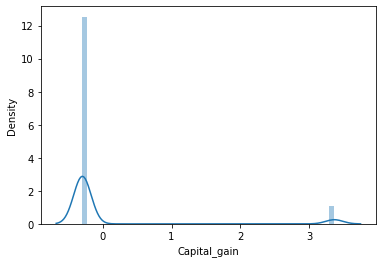

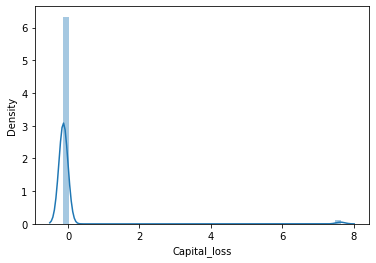

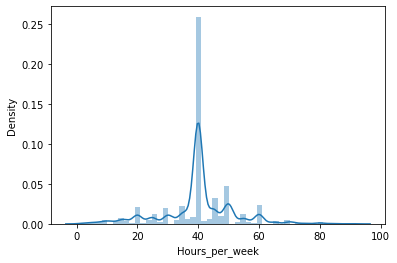

<Figure size 432x288 with 0 Axes>

In [54]:
#checking skewness after removing
for i in continues:
    sns.distplot(cen_income[i])
    plt.figure()


A lot of skewness has been resuced but we cannot remove skewness more than this.

In [55]:
#Separating dependent and independent features.
x=cen_income.copy()
x.drop('Income',axis=1,inplace=True)
y=cen_income['Income']

### Handling Imbalanced Data

In [57]:
#Oversampling using Smote
from imblearn.over_sampling import SMOTE
over=SMOTE()



In [58]:
x,y=over.fit_resample(x,y)

1    23380
0    23380
Name: Income, dtype: int64

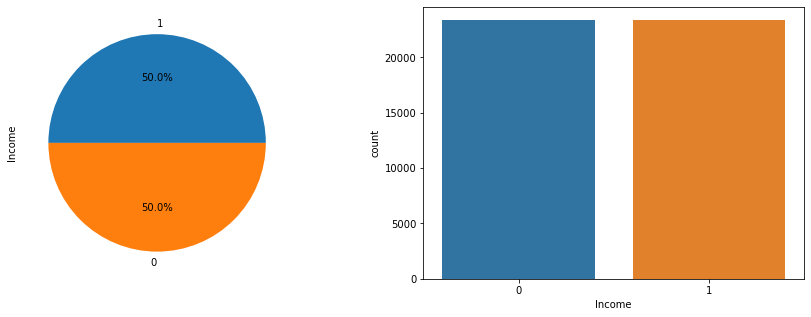

In [59]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(y)
y.value_counts()

Data is balanced now, both the category of income have 50% data each.

### Scaling the data

In [60]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [61]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

# Building Machine Learning Models

In [68]:
from sklearn.model_selection import train_test_split,cross_val_score

#importing models
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [69]:
#importing metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [70]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=1000
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [71]:
#Creating list of models and another list mapped to their names
models=[GaussianNB(),KNeighborsClassifier(),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(verbosity=0)]

names=['GaussianNB','KNeighborsClassifier','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier',
       'XGBClassifier']

In [73]:
#Creating methord for the models and appending them to data frame

def createmodels(model_list,independent,dependent,n):
    xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.25,random_state=randomstate(independent,dependent))
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    acc=[]
    ars=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,independent,dependent,cv=10)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2))
        mcv.append(np.round(np.mean(score),4))
        acc.append(np.round(accuracy_score(p,ytest),4))
        ars.append(np.round(roc_auc_score(ytest,model.predict_proba(xtest)[:,1]),4))
        
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross validaton Score']=mcv
    data['Accuracy']=acc
    data['AUC_ROC Score']=ars
    data.set_index('Model',inplace = True)
    return data

In [74]:
createmodels(models,x,y,names)

Mean Absolute Error  Mean Squared Error  \
Model                                                                 
GaussianNB                               0.2202              0.2202   
KNeighborsClassifier                     0.1489              0.1489   
LogisticRegression                       0.2263              0.2263   
DecisionTreeClassifier                   0.1466              0.1466   
RandomForestClassifier                   0.1015              0.1015   
AdaBoostClassifier                       0.1448              0.1448   
GradientBoostingClassifier               0.1297              0.1297   
XGBClassifier                            0.0905              0.0905   

                            Root Mean Squared Error  R2 Score  \
Model                                                           
GaussianNB                                   0.4692      0.11   
KNeighborsClassifier                         0.3859      0.40   
LogisticRegression                           0.4758      0.09   
DecisionTreeClassifier                       0.3829      0.41   
RandomForestClassifier                       0.3187      0.59   
AdaBoostClassifier                           0.3806      0.42   
GradientBoostingClassifier                   0.3601      0.48   
XGBClassifier                                0.3008      0.64   

                            Mean of Cross validaton Score  Accuracy  \
Model                                                                 
GaussianNB                                         0.7757    0.7798   
KNeighborsClassifier                               0.8581    0.8511   
LogisticRegression                                 0.7665    0.7737   
DecisionTreeClassifier                             0.8509    0.8534   
RandomForestClassifier                             0.9007    0.8985   
AdaBoostClassifier                                 0.8510    0.8552   
GradientBoostingClassifier                         0.8638    0.8703   
XGBClassifier                                      0.8994    0.9095   

                            AUC_ROC Score  
Model                                      
GaussianNB                         0.8571  
KNeighborsClassifier               0.9151  
LogisticRegression                 0.8533  
DecisionTreeClassifier             0.8534  
RandomForestClassifier             0.9624  
AdaBoostClassifier                 0.9308  
GradientBoostingClassifier         0.9469  
XGBClassifier                      0.9739

Random Forest, Gradient Boost, Xtreme Gradient Boost give us the best performance, so we further try hyperparameter tuning on them

## Hyperparameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

### Random Forest

In [78]:
params={'n_estimators':[100,300,500],
           'max_features':['int','float','log2']}

g=GridSearchCV(RandomForestClassifier(),params,cv=10)

g.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['int', 'float', 'log2'],
                         'n_estimators': [100, 300, 500]})

In [79]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'max_features': 'log2', 'n_estimators': 300}
RandomForestClassifier(max_features='log2', n_estimators=300)
0.8949244368406045


In [80]:
m=RandomForestClassifier(max_features='log2', n_estimators=300)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [81]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))
print('AUC_ROC Score is',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
print('Accuracy is',np.round(accuracy_score(p,ytest),4))

Mean Absolute Error is 0.0999
Mean Squared Error is 0.0999
Root Mean Squared Error is 0.3161
R2 Score is 59.99
Mean of cross validaton Score is 90.1711
AUC_ROC Score is 0.9633
Accuracy is 0.9001


### Gradient Boost

In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
params={'subsample':[0.5,1],
      'max_depth':[6,7,8,9,10,None]}

g=RandomizedSearchCV(GradientBoostingClassifier(),params,cv=10)

g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [6, 7, 8, 9, 10, None],
                                        'subsample': [0.5, 1]})

In [85]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'subsample': 1, 'max_depth': 10}
GradientBoostingClassifier(max_depth=10, subsample=1)
0.9028229255774167


In [86]:
m=GradientBoostingClassifier(max_depth=10, subsample=1)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [87]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))
print('AUC_ROC Score is',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
print('Accuracy is',np.round(accuracy_score(p,ytest),4))

Mean Absolute Error is 0.0934
Mean Squared Error is 0.0934
Root Mean Squared Error is 0.3056
R2 Score is 62.629999999999995
Mean of cross validaton Score is 90.0043
AUC_ROC Score is 0.9718
Accuracy is 0.9066


### Xtreme Gradient Boost

In [88]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15] ,
 "max_depth"        : [ 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2],
 "colsample_bytree" : [ 0.3, 0.4, 0.5]
    }

g=RandomizedSearchCV(XGBClassifier(),params,cv=10)

g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                         

In [89]:
print(g.best_params_)
print(g.best_estimator_)
print(g.best_score_)

{'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.5}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.908183632734531


In [90]:
m=XGBClassifier(colsample_bytree=0.5, gamma= 0.1, learning_rate= 0.15, max_depth= 15, min_child_weight= 1)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
score=cross_val_score(m,x,y,cv=10)

In [91]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))
print('AUC_ROC Score is',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
print('Accuracy is',np.round(accuracy_score(p,ytest),4))

Mean Absolute Error is 0.0872
Mean Squared Error is 0.0872
Root Mean Squared Error is 0.2952
R2 Score is 65.13
Mean of cross validaton Score is 90.355
AUC_ROC Score is 0.975
Accuracy is 0.9128


We choose Xtreme Gradient Boost as our final model because it gives the highest cross validation score as well as difference between its accuracy score and cross validation score is minimum.

# Finalizing the model

In [92]:
model=XGBClassifier(colsample_bytree=0.5, gamma= 0.1, learning_rate= 0.15, max_depth= 15, min_child_weight= 1)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
score=cross_val_score(model,x,y,cv=10)

### Evaluation Metrics

In [93]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,ytest),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,ytest),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest)),4))
print('R2 Score is',np.round(r2_score(p,ytest),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))
print('AUC_ROC Score is',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
print('Accuracy is',np.round(accuracy_score(p,ytest),4))

Mean Absolute Error is 0.0872
Mean Squared Error is 0.0872
Root Mean Squared Error is 0.2952
R2 Score is 65.13
Mean of cross validaton Score is 90.355
AUC_ROC Score is 0.975
Accuracy is 0.9128


In [95]:
print('Confusion Matrix')
print(confusion_matrix(p,ytest))
print('----------------------------------------------------------')
print('Classification Report')
print(classification_report(p,ytest))

Confusion Matrix
[[5355  528]
 [ 491 5316]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      5883
           1       0.91      0.92      0.91      5807

    accuracy                           0.91     11690
   macro avg       0.91      0.91      0.91     11690
weighted avg       0.91      0.91      0.91     11690



# Saving the model

In [97]:
import joblib
joblib.dump(model,'censusincome.obj')

['censusincome.obj']